In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from ast import literal_eval

In [221]:
names = {}
names[20] = [
    "seed",
    "depth",
    "window",
    "method",
    "budget",
    "stagei",
    "skills",
    "opt",
    "lr",
    "num_nodes",
    "num_layers",
    "epoch",
    "loss",
    "acc",
    "score",
    "wait",
    "patience",
    "test",
]
names[21] = [
    "seed",
    "depth",
    "window",
    "method",
    "stagei",
    "skills",
    "budget",
    "opt",
    "lr",
    "num_nodes",
    "num_layers",
    "epoch",
    "loss",
    "acc",
    "score",
    "wait",
    "patience",
    "test",
]
names[29] = [
    "seed",
    "depth",
    "window",
    "method",
    "stagei",
    "skills",
    "budget",
    "disc_thresh",
    "disc_steps",
    "opt",
    "lr",
    "num_nodes",
    "num_layers",
    "epoch",
    "loss",
    "acc",
    "wait",
    "patience",
    "test",
]


def get_df(v):

    if v >= 29:
        n = names[29]
    elif v > 21:
        n = names[21]
    else:
        n = names[v]
    df = pd.read_csv(f"/scratch1/fs1/chien-ju.ho/Active/tree/output{v}.txt", names=n)
    # df['dup'] = (df.epoch == 0).astype(int)
    # df['dup'] = df.groupby(categories)['dup'].cumsum()
    # df = df.groupby(categories + ['dup']).filter(lambda x: x['wait'].max() == x['patience'].iloc[0])
    # df = df[df.wait == 0]
    # df = df.drop_duplicates(categories + ['dup'], keep='last')
    # df = df.groupby(categories).mean().reset_index()
    df = df[~df.stagei.isna()]
    df["stagei"] = df.stagei.astype(int)
    df["skillsi"] = df.apply(
        lambda x: "_".join(x.skills.split("_")[: x.stagei + 1]), axis=1
    )
    df['num_nodes'] = df[['num_nodes','num_layers']].apply(tuple, axis=1)
    if v >= 30:
        df[["budget_type", "budget"]] = df.budget.str.split("_", expand=True)
        df["budget"] = np.log2(df.budget.astype(int))
        df['crit_freq'] = df.method.apply(lambda x: x.split('-')[-1])
        df['crit_gen'] = df.method.apply(lambda x: '-'.join(x.split('-')[:-1]))
    elif v >= 21:
        df[["budget_type", "budget"]] = df.budget.str.split("_", expand=True)
        df["budget"] = np.log2(df.budget.astype(int))
    elif v >= 20:
        df["budget"] = np.log2(df.budget)
    return df

In [273]:
%%time
# 33 contains the most data at different depths, thresholds, steps, etc
df = get_df(34)
df['opt'] = df.opt+"-"+df.lr.astype(str)
df.shape

CPU times: user 4.49 s, sys: 21.2 ms, total: 4.51 s
Wall time: 4.59 s


(198001, 23)

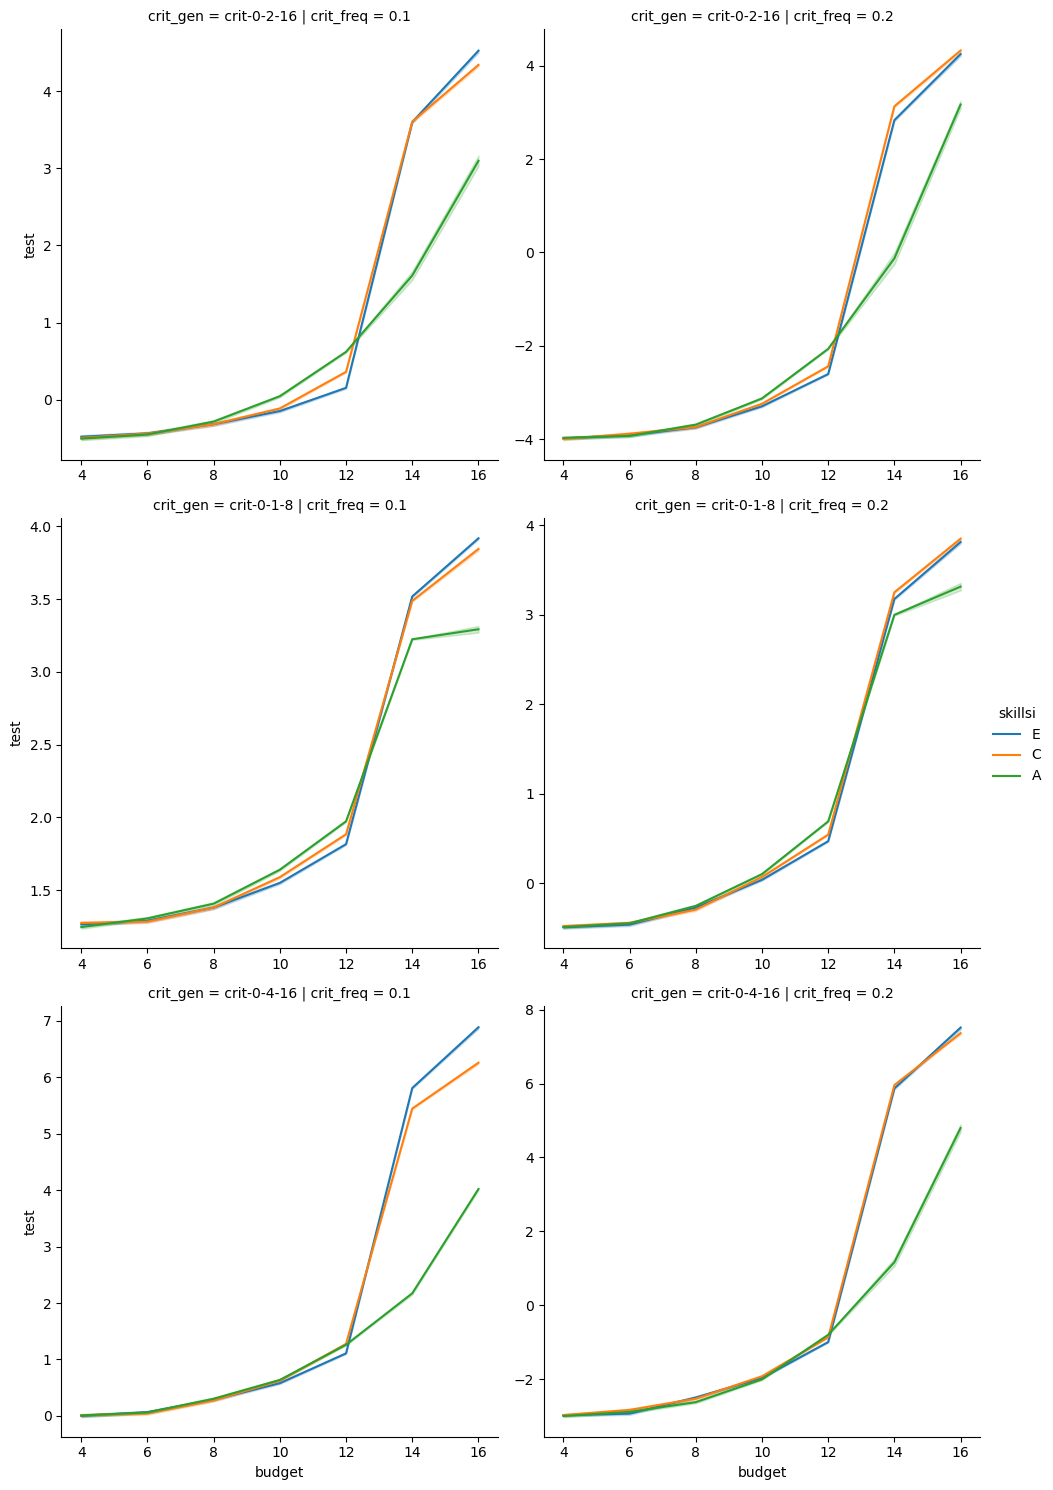

In [274]:
df_ = df[(df.depth == 5) & (df.skillsi.apply(lambda x: len(x) == 1))].copy()

g = sns.relplot(
    data=df_,
    x="budget",
    y="test",
    hue="skillsi",
    row="crit_gen",
    col="crit_freq",
    kind="line",
    errorbar="se",
    facet_kws={"sharex": False, "sharey": False},
)

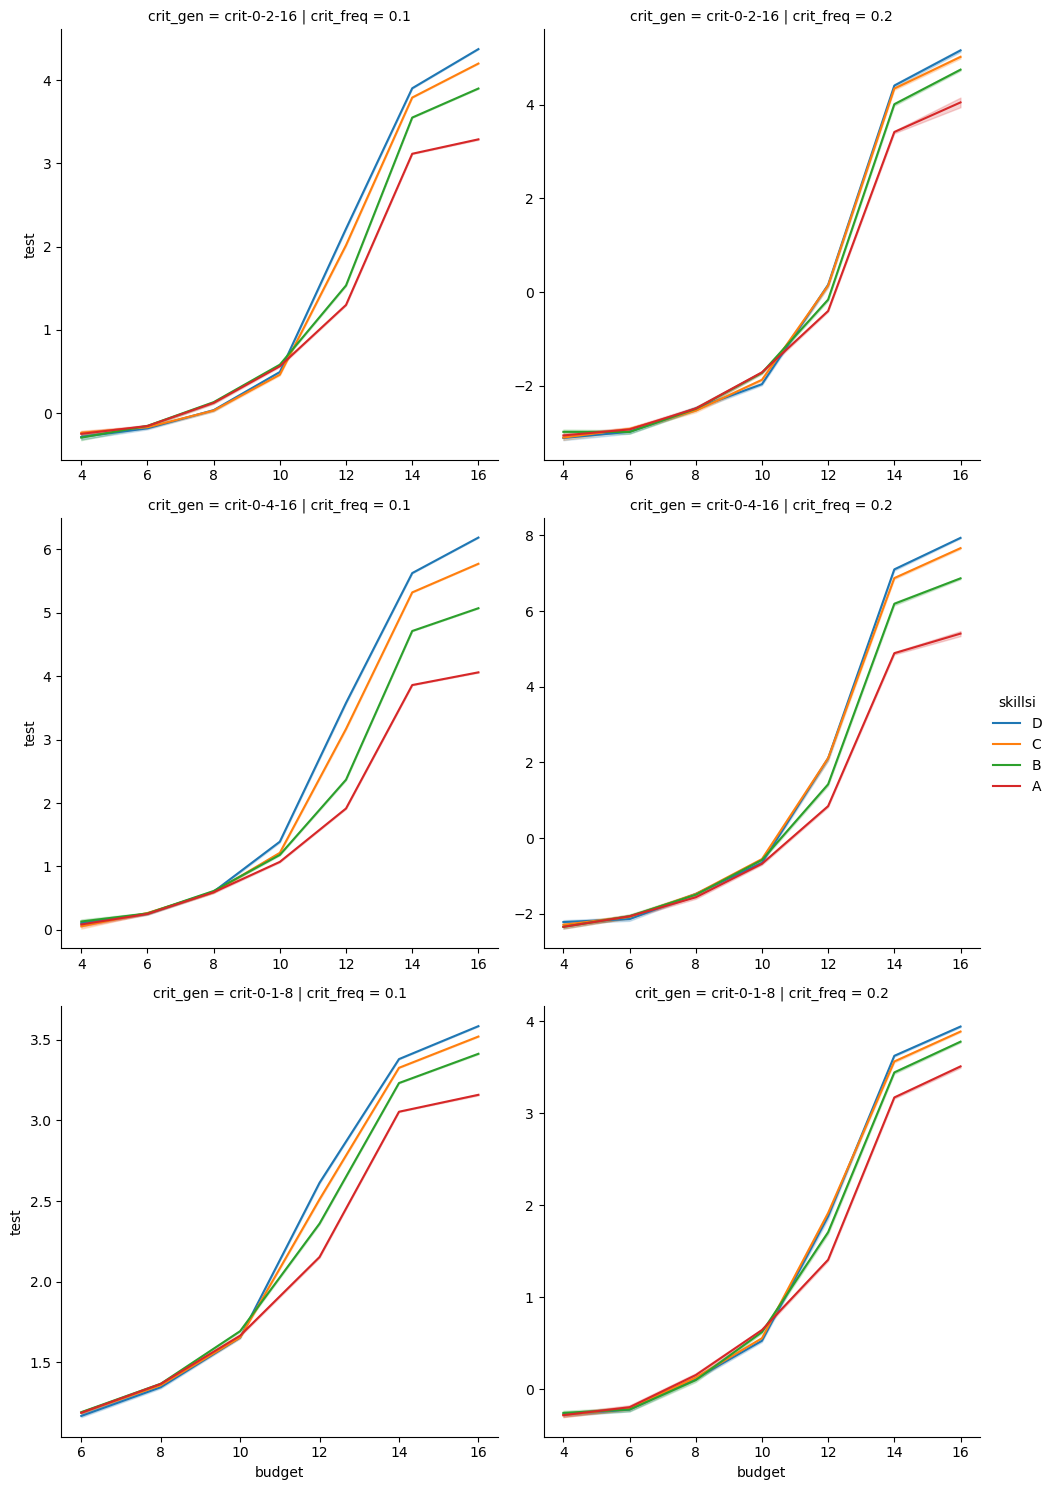

In [275]:
df_ = df[(df.depth == 4) & (df.skillsi.apply(lambda x: len(x) == 1))].copy()

g = sns.relplot(
    data=df_,
    x="budget",
    y="test",
    hue="skillsi",
    row="crit_gen",
    col="crit_freq",
    kind="line",
    errorbar="se",
    facet_kws={"sharex": False, "sharey": False},
)

In [255]:
%%time
# 33 contains the most data at different depths, thresholds, steps, etc
df = get_df(33)
df['opt'] = df.opt+"-"+df.lr.astype(str)
df.shape

CPU times: user 38 s, sys: 15.4 s, total: 53.4 s
Wall time: 54 s


(1849187, 23)

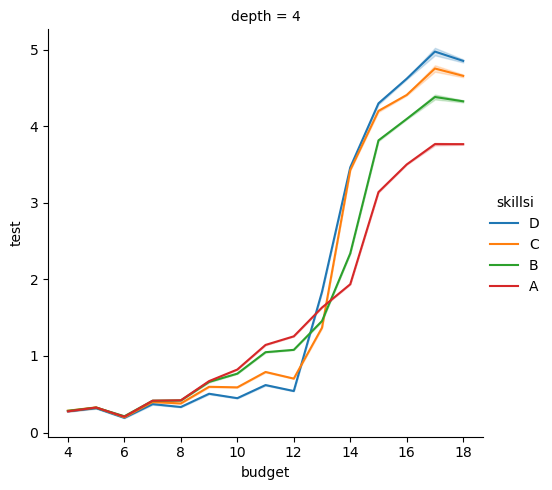

In [256]:
df_ = df[(df.depth==4) & (df.skillsi.apply(lambda x: len(x) == 1))].copy()

g = sns.relplot(
    data=df_,
    x="budget",
    y="test",
    hue="skillsi",
    row="depth",
    # col="disc_steps",
    kind="line",
    errorbar="se",
    facet_kws={"sharex": False, "sharey": False},
)

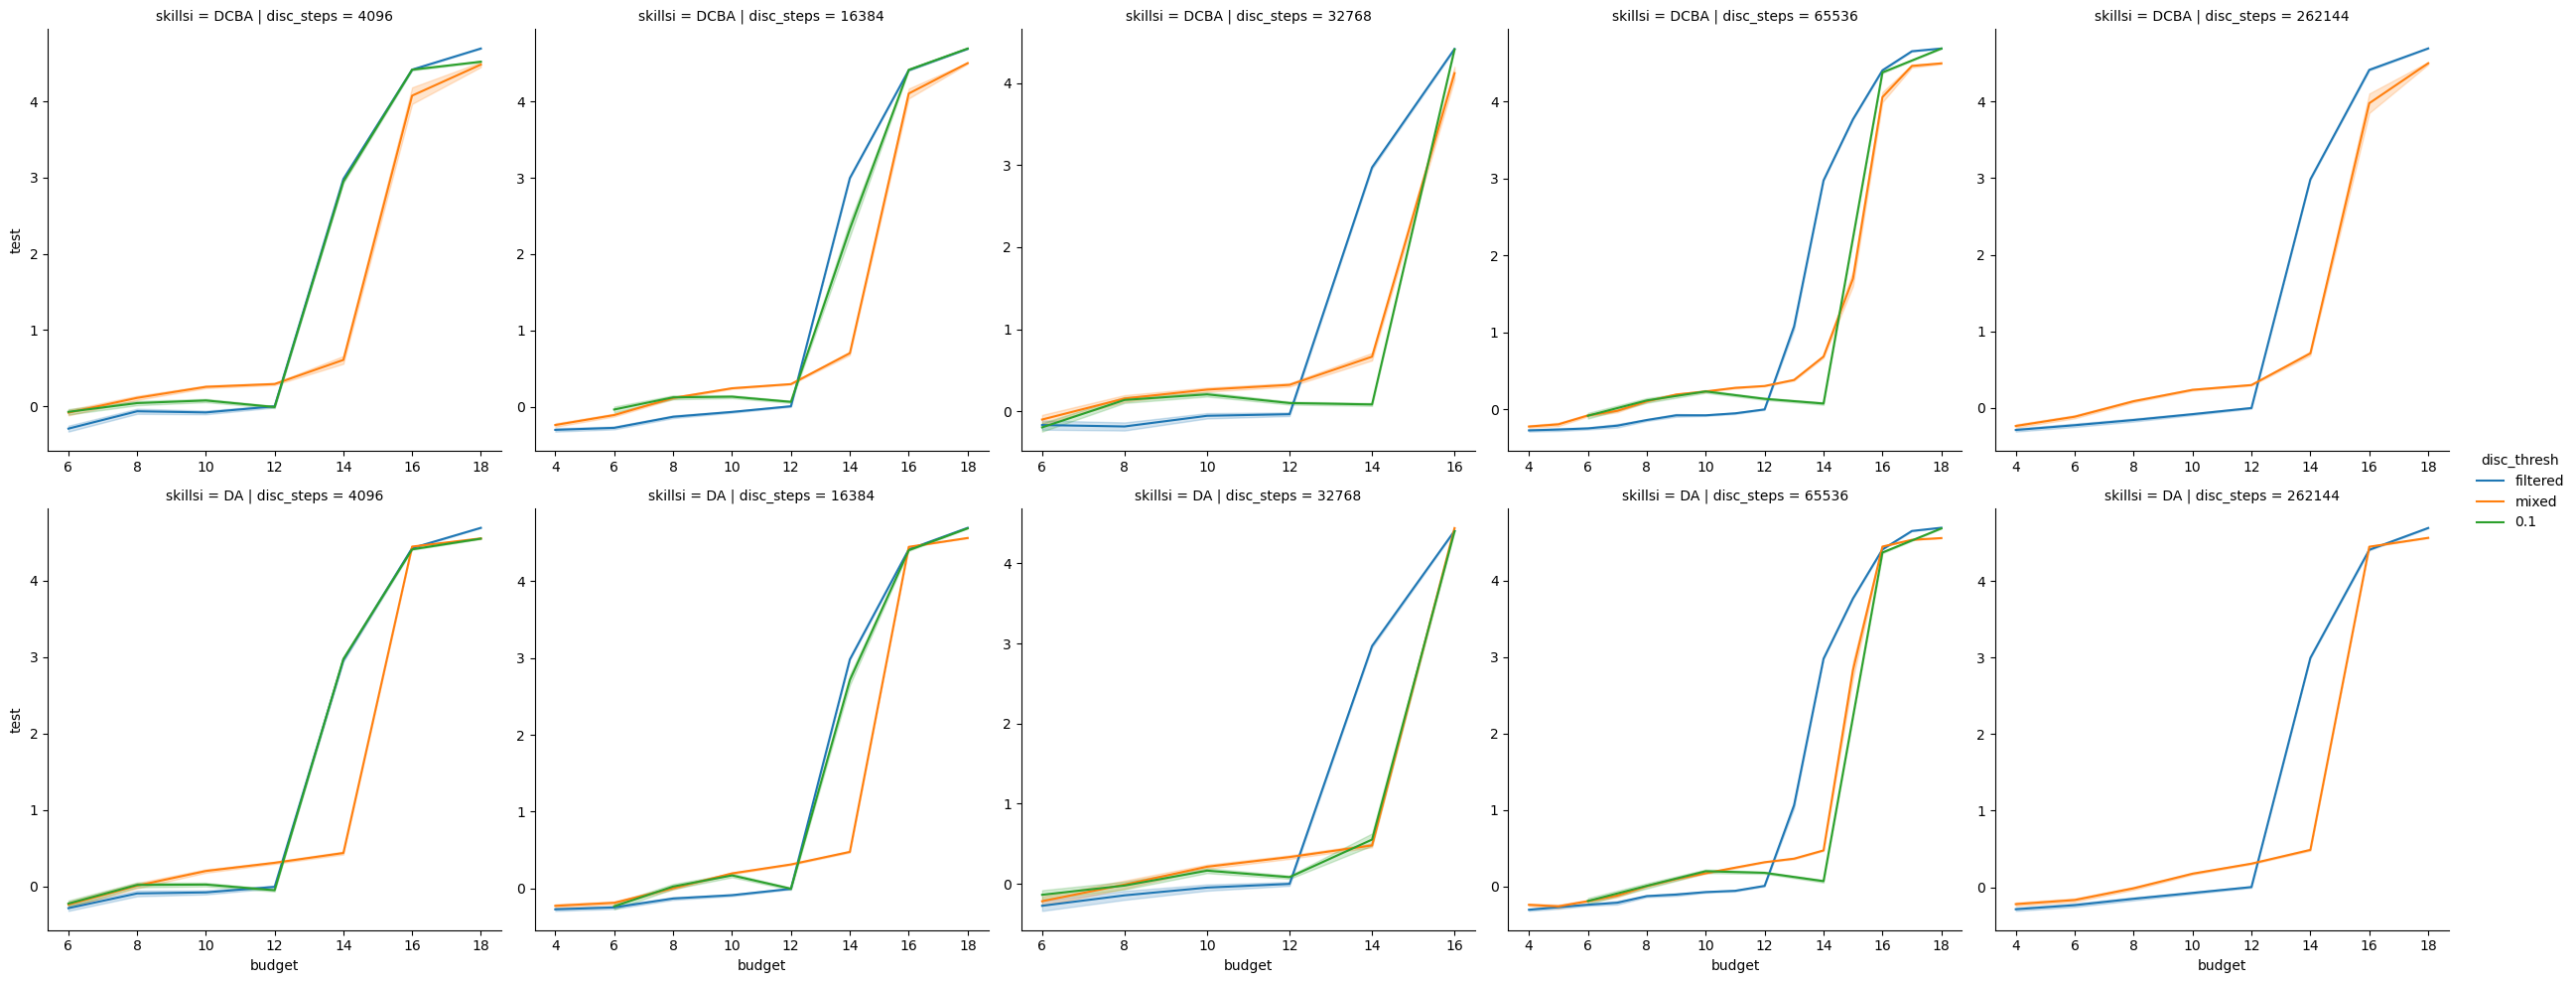

In [247]:
df_ = df[(df.crit_gen=='crit-0-2-16') & df.disc_thresh.isin([0, 0.1, 1]) & (df.depth == 4) & (df.skillsi.apply(lambda x: len(x) > 1))].copy()
df_['disc_thresh'] = df_.disc_thresh.astype(str)
df_['disc_thresh'] = df_.disc_thresh.replace({'0.0':'filtered', '1.0':'mixed'})

g = sns.relplot(
    data=df_,
    x="budget",
    y="test",
    hue="disc_thresh",
    row="skillsi",
    col="disc_steps",
    kind="line",
    errorbar="se",
    facet_kws={"sharex": False, "sharey": False},
)

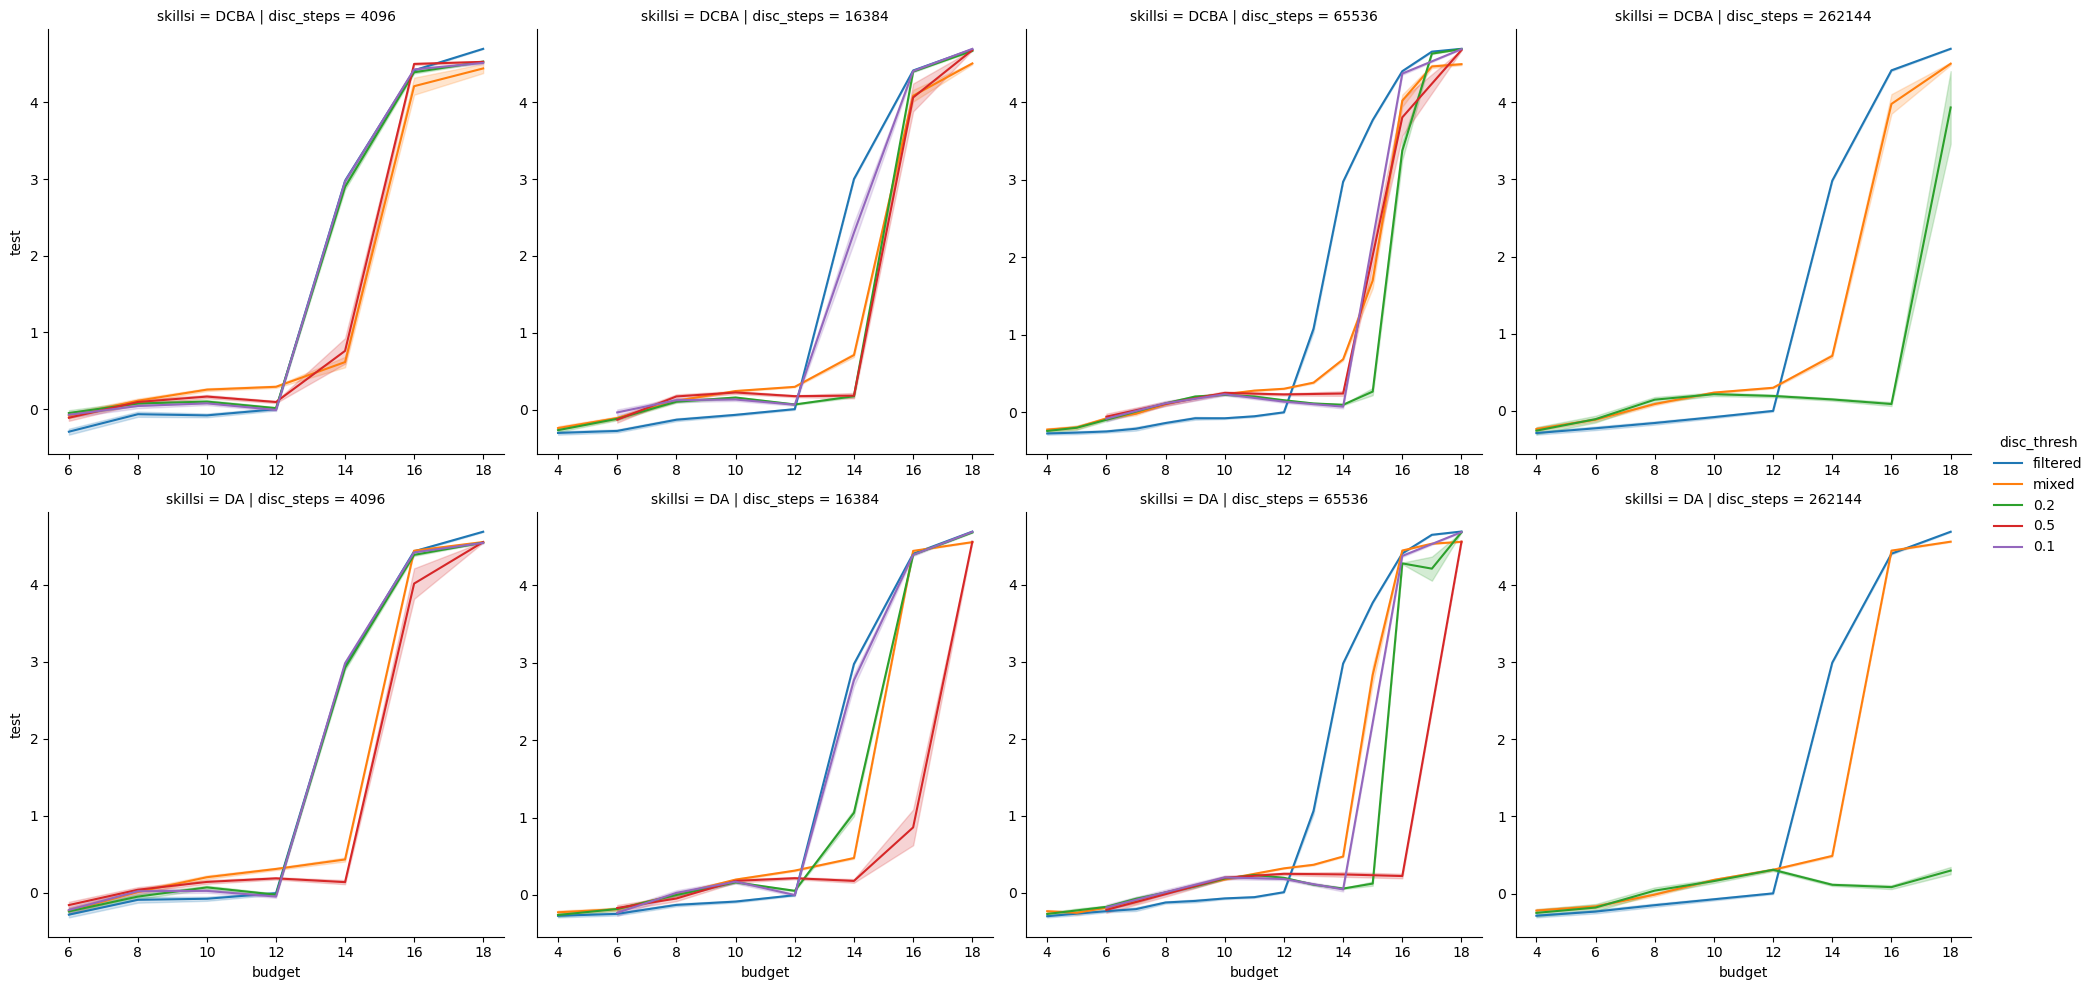

In [240]:
df_ = df[(df.crit_gen=='crit-0-2-16') & df.disc_thresh.isin([0, 0.1, 0.2, 0.5, 1]) & (df.depth == 4) & (df.skillsi.apply(lambda x: len(x) > 1))].copy()
df_['disc_thresh'] = df_.disc_thresh.astype(str)
df_['disc_thresh'] = df_.disc_thresh.replace({'0.0':'filtered', '1.0':'mixed'})

g = sns.relplot(
    data=df_,
    x="budget",
    y="test",
    hue="disc_thresh",
    row="skillsi",
    col="disc_steps",
    kind="line",
    errorbar="se",
    facet_kws={"sharex": False, "sharey": False},
)

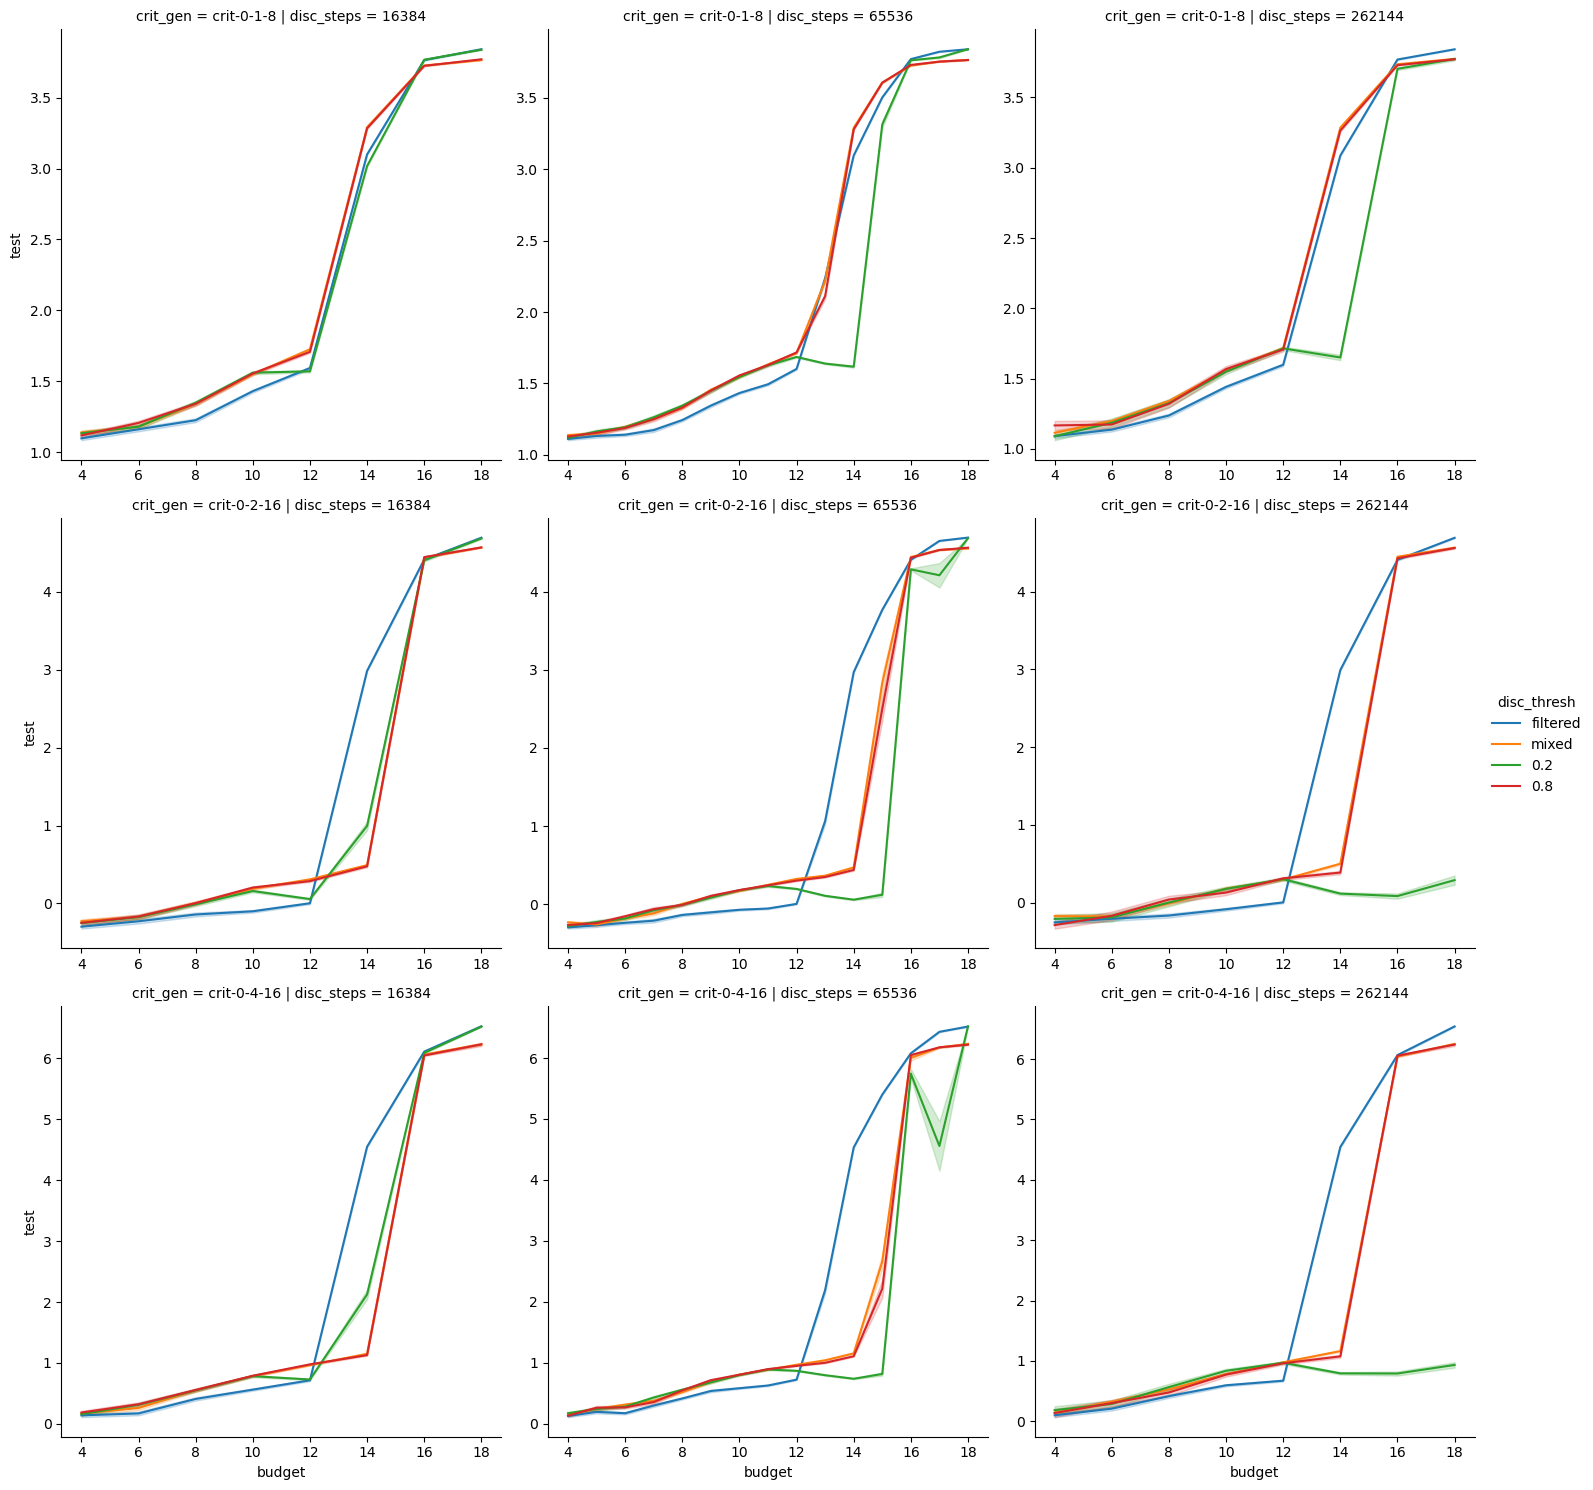

In [220]:
df_ = df[df.disc_thresh.isin([0, 0.2, 0.8, 1]) & (df.depth == 4) & (df.skillsi == 'DA')].copy()
df_['disc_thresh'] = df_.disc_thresh.astype(str)
df_['disc_thresh'] = df_.disc_thresh.replace({'0.0':'filtered', '1.0':'mixed'})

g = sns.relplot(
    data=df_,
    x="budget",
    y="test",
    hue="disc_thresh",
    row="crit_gen",
    col="disc_steps",
    kind="line",
    errorbar="se",
    facet_kws={"sharex": False, "sharey": False},
)

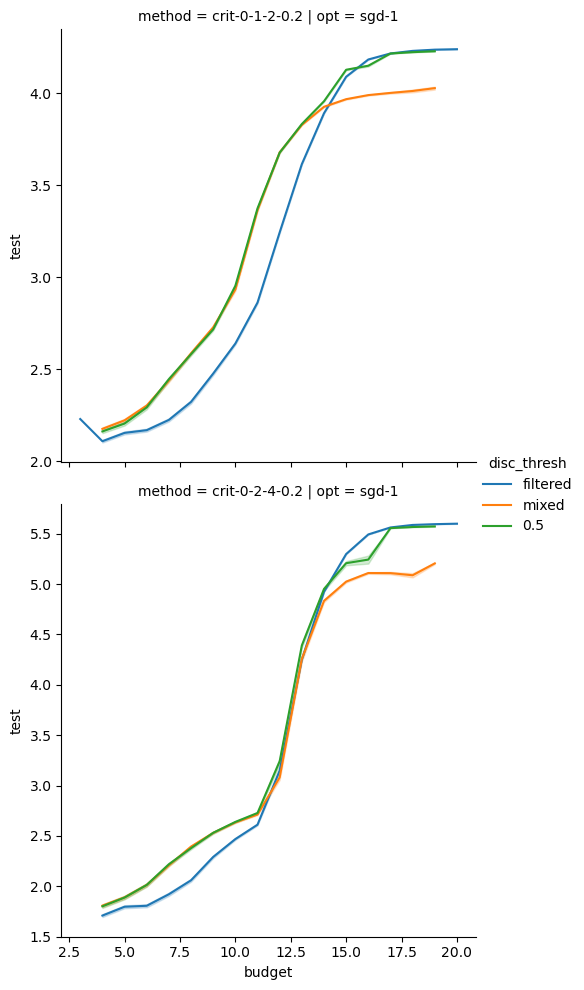

In [130]:
df_ = df[df.disc_thresh.isin([0, 0.5, 1]) & (df.skillsi=='DCBA') & (df.method.isin(['crit-0-1-2-0.2', 'crit-0-2-4-0.2']))].copy()
df_['disc_thresh'] = df_.disc_thresh.astype(str)
df_['disc_thresh'] = df_.disc_thresh.replace({'0.0':'filtered', '1.0':'mixed'})

g = sns.relplot(
    data=df_,
    x="budget",
    y="test",
    hue="disc_thresh",
    row="method",
    col="opt",
    kind="line",
    errorbar="se",
    facet_kws={"sharey": False},
)

In [117]:
df.pivot_table(index=('method','disc_thresh'), columns='budget', values='seed', aggfunc='count')

budget                      3.0     4.0     5.0     6.0     7.0     8.0   \
method         disc_thresh                                                 
crit-0-1-2-0.2 0.0           3.0  1926.0  1989.0  2000.0  2000.0  2000.0   
               0.2           NaN   481.0   499.0   500.0   500.0   500.0   
               0.4           NaN   478.0   497.0   500.0   500.0   500.0   
               0.5           NaN  1464.0  1497.0  1500.0  1500.0  1500.0   
               0.6           NaN   485.0   498.0   500.0   500.0   500.0   
               0.8           NaN   480.0   498.0   500.0   500.0   500.0   
               1.0           NaN  1927.0  1995.0  2000.0  2000.0  2000.0   
crit-0-1-4-0.2 0.0           NaN     1.0     NaN     NaN     NaN     NaN   
               1.0           NaN     1.0     NaN     NaN     NaN     NaN   
crit-0-2-4-0.2 0.0           NaN  1948.0  1995.0  2000.0  2000.0  2000.0   
               0.2           NaN   484.0   499.0   500.0   500.0   500.0   
               0.4           NaN   489.0   500.0   500.0   500.0   500.0   
               0.5           NaN  1472.0  1496.0  1500.0  1500.0  1500.0   
               0.6           NaN   480.0   497.0   500.0   500.0   500.0   
               0.8           NaN   484.0   499.0   500.0   500.0   500.0   
               1.0           NaN  1961.0  1996.0  2000.0  2000.0  2000.0   

budget                        9.0     10.0    11.0    12.0    13.0    14.0  \
method         disc_thresh                                                   
crit-0-1-2-0.2 0.0          2001.0  2000.0  2000.0  2000.0  2000.0  2000.0   
               0.2           500.0   500.0   500.0   500.0   500.0   500.0   
               0.4           500.0   500.0   500.0   500.0   500.0   500.0   
               0.5          1500.0  1500.0  1500.0  1500.0  1500.0  1500.0   
               0.6           500.0   500.0   500.0   500.0   500.0   500.0   
               0.8           500.0   500.0   500.0   500.0   500.0   500.0   
               1.0          2000.0  2000.0  2000.0  2000.0  2000.0  2000.0   
crit-0-1-4-0.2 0.0             NaN     NaN     NaN     NaN     NaN     NaN   
               1.0             NaN     NaN     NaN     NaN     NaN     NaN   
crit-0-2-4-0.2 0.0          2000.0  2000.0  2000.0  2000.0  2000.0  2000.0   
               0.2           500.0   500.0   500.0   500.0   500.0   500.0   
               0.4           500.0   500.0   500.0   500.0   500.0   500.0   
               0.5          1500.0  1500.0  1500.0  1500.0  1500.0  1500.0   
               0.6           500.0   500.0   500.0   500.0   500.0   500.0   
               0.8           500.0   500.0   500.0   500.0   500.0   500.0   
               1.0          2000.0  2000.0  2000.0  2001.0  2000.0  2000.0   

budget                        15.0    16.0   17.0   18.0   19.0  20.0  
method         disc_thresh                                             
crit-0-1-2-0.2 0.0          2000.0  1767.0  899.0  441.0  197.0  55.0  
               0.2           500.0   348.0  183.0   91.0   40.0   1.0  
               0.4           500.0   364.0  148.0   67.0   44.0   NaN  
               0.5          1500.0  1088.0  462.0  199.0  112.0   NaN  
               0.6           500.0   320.0  150.0   71.0   45.0   NaN  
               0.8           500.0   359.0  185.0   70.0   49.0   NaN  
               1.0          2000.0  1914.0  987.0  490.0  198.0   NaN  
crit-0-1-4-0.2 0.0             NaN     NaN    NaN    NaN    NaN   NaN  
               1.0             NaN     NaN    NaN    NaN    NaN   NaN  
crit-0-2-4-0.2 0.0          2000.0  1658.0  743.0  381.0  183.0  48.0  
               0.2           500.0   358.0  167.0   72.0   44.0   3.0  
               0.4           500.0   367.0  139.0   55.0   35.0   NaN  
               0.5          1500.0  1036.0  417.0  177.0  107.0   NaN  
               0.6           500.0   320.0  132.0   62.0   25.0   NaN  
               0.8           500.0   330.0  154.0   62.0   47.0   NaN  
  

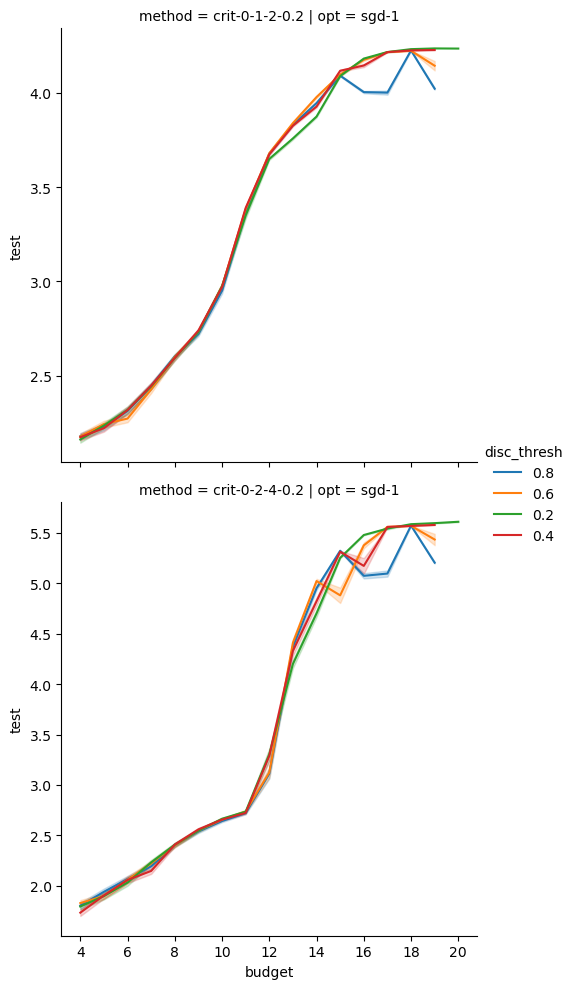

In [126]:
df_ = df[df.disc_thresh.isin([0.2, 0.4, 0.6, 0.8]) & (df.skillsi=='DCBA')].copy()
df_['disc_thresh'] = df_.disc_thresh.astype(str)
df_['disc_thresh'] = df_.disc_thresh.replace({'0.0':'filtered', '1.0':'mixed'})

g = sns.relplot(
    data=df_,
    x="budget",
    y="test",
    hue="disc_thresh",
    row="method",
    col="opt",
    kind="line",
    errorbar="se",
    facet_kws={"sharey": False},
)

In [140]:
df['crit_freq'] = df.method.apply(lambda x: x.split('-')[-1])
df['crit_gen'] = df.method.apply(lambda x: '-'.join(x.split('-')[:-1]))

In [ ]:
df_ = df[df.skillsi.isin(['D','C','B','A']) & (df.depth == 4)].copy()

g = sns.relplot(
    data=df_,
    x="budget",
    y="test",
    hue="skillsi",
    row="crit_gen",
    col="crit_freq",
    kind="line",
    errorbar="se",
    facet_kws={"sharey": False},
)

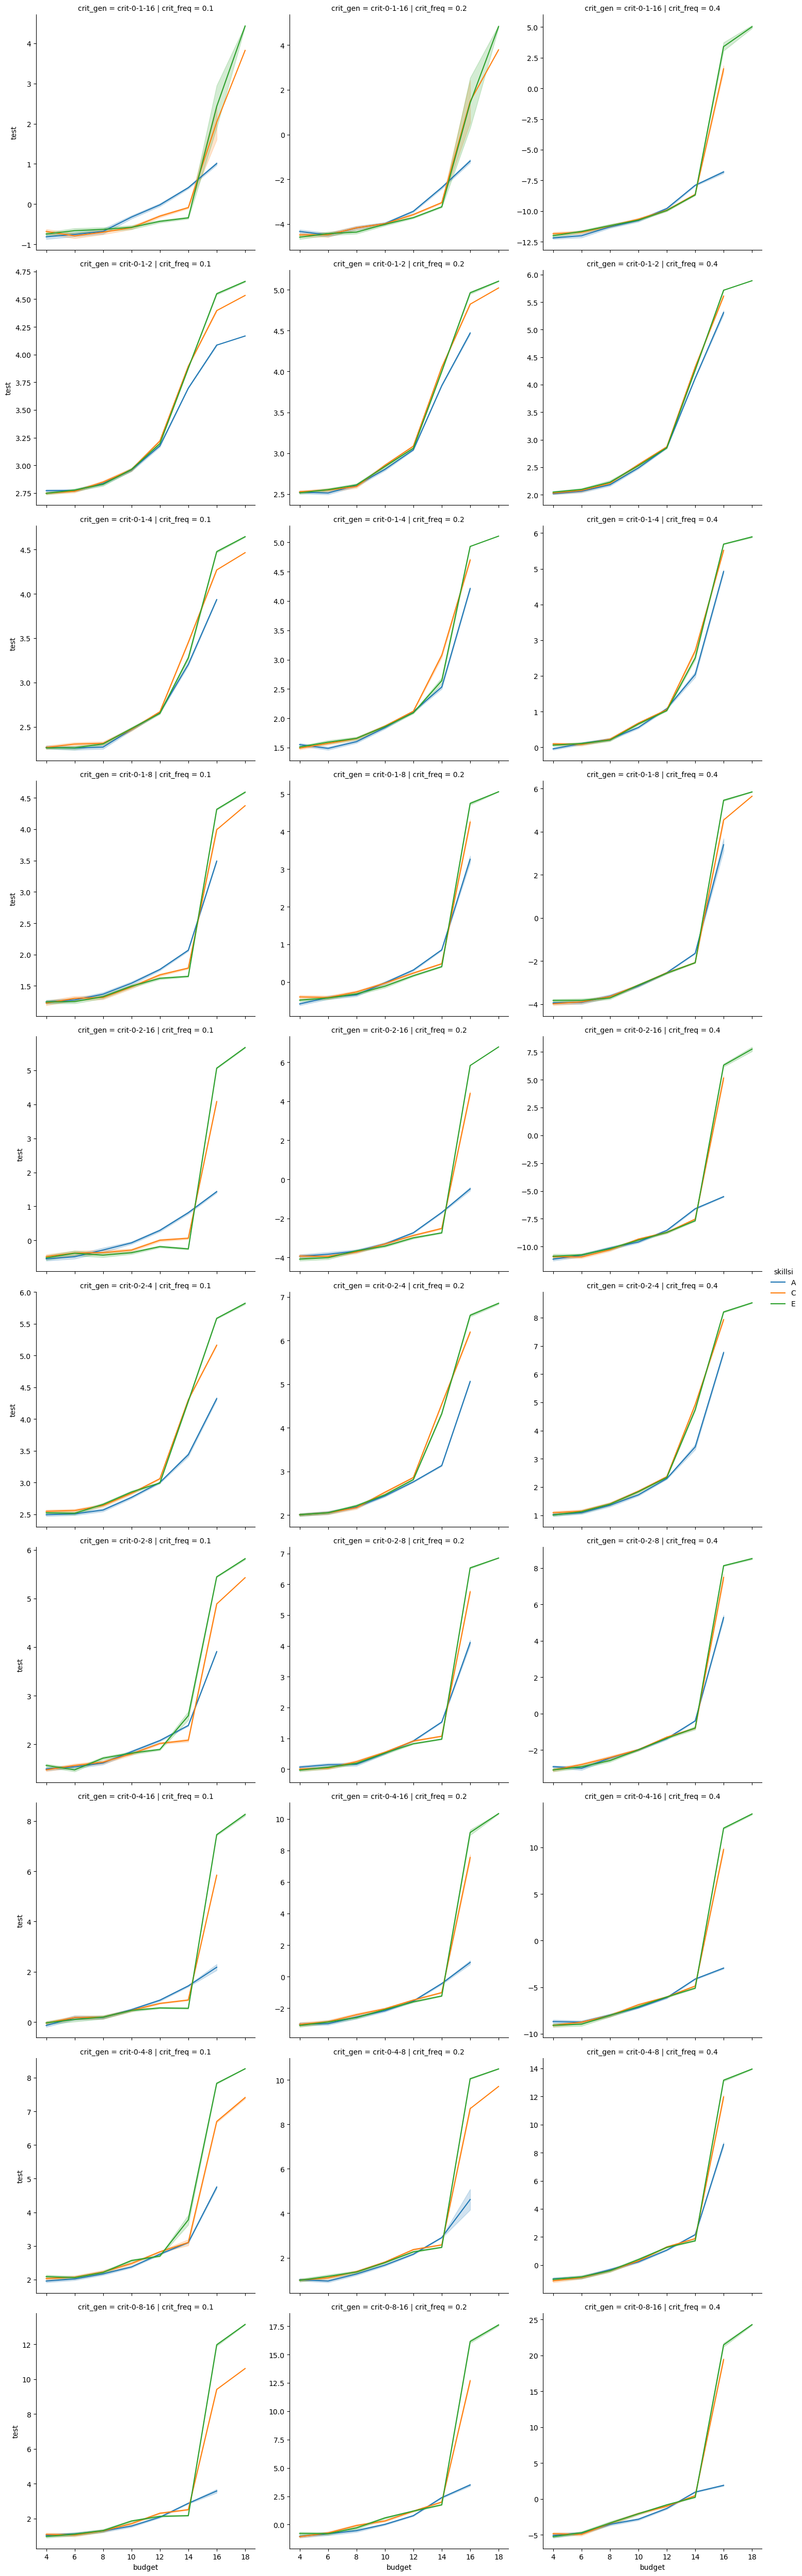

In [157]:
df_ = df[df.skillsi.isin(['E','C','A']) & (df.depth == 5)].copy()
df_ = df_.sort_values(['crit_gen','crit_freq','skillsi'])

g = sns.relplot(
    data=df_,
    x="budget",
    y="test",
    hue="skillsi",
    row="crit_gen",
    col="crit_freq",
    kind="line",
    errorbar="se",
    facet_kws={"sharey": False},
)

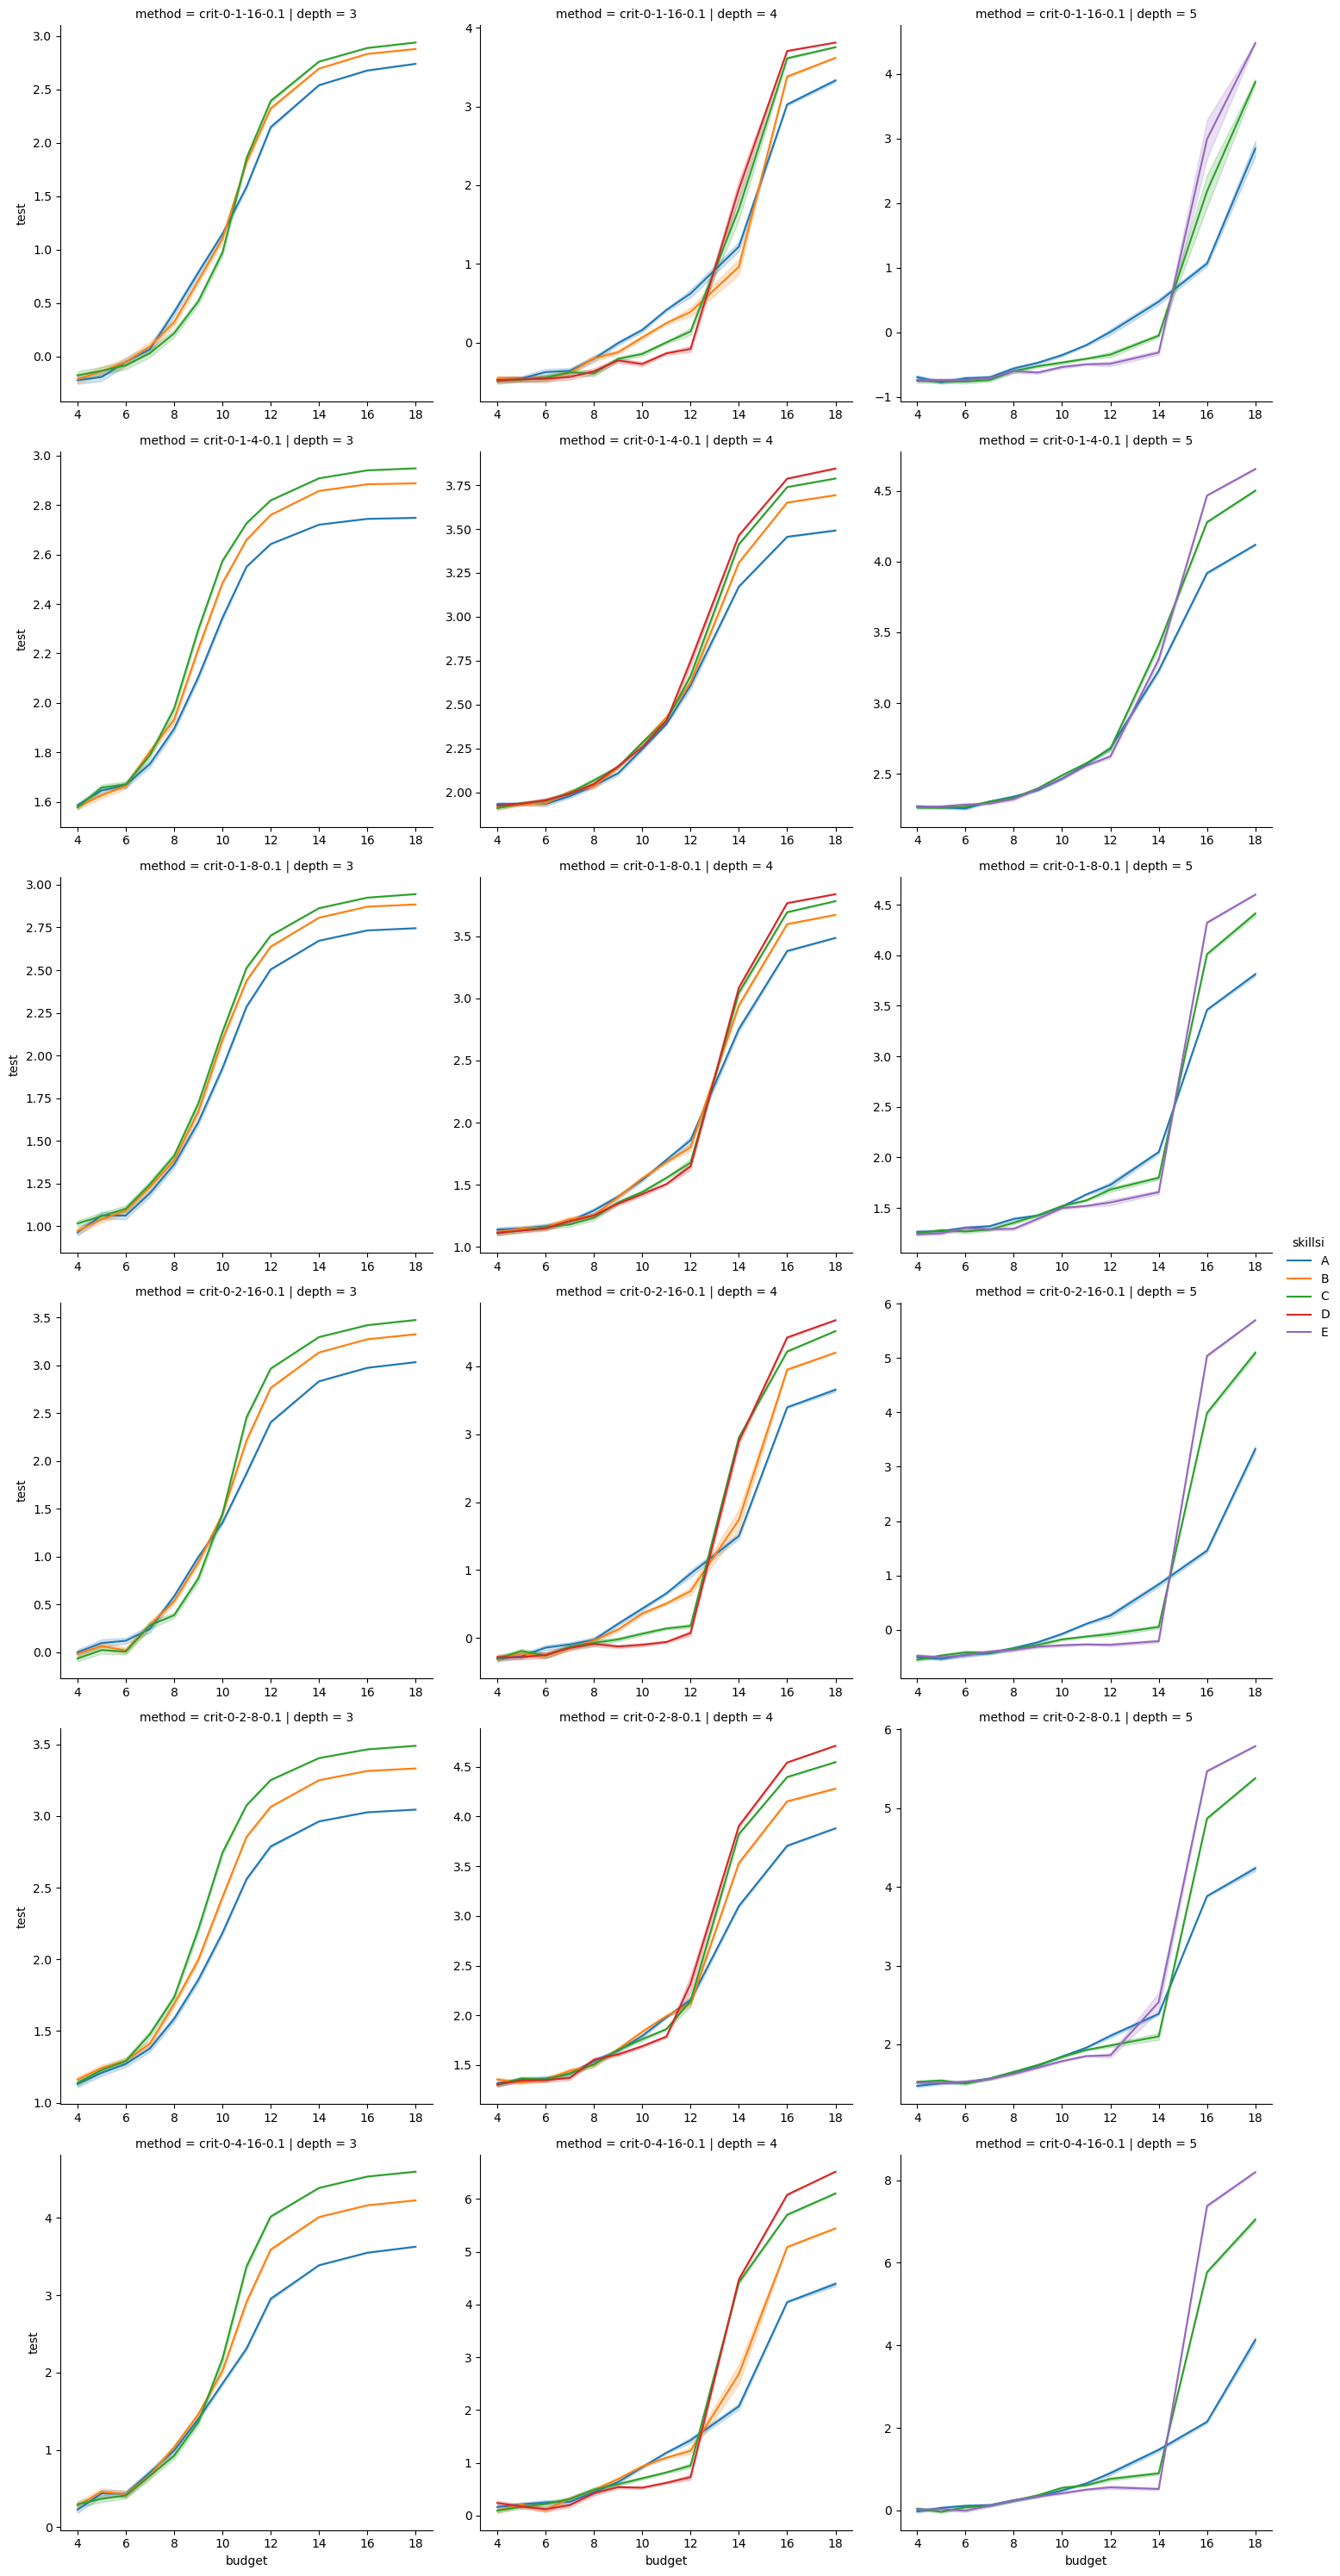

In [174]:
df_ = df.copy()
df_ = df_.sort_values(['crit_gen','crit_freq','skillsi'])

g = sns.relplot(
    data=df_,
    x="budget",
    y="test",
    hue="skillsi",
    row="method",
    col="depth",
    kind="line",
    errorbar="se",
    facet_kws={"sharey": False, "sharex": False},
)

In [58]:
df.num_nodes.value_counts()

num_nodes
(32, 2)    14143
Name: count, dtype: int64

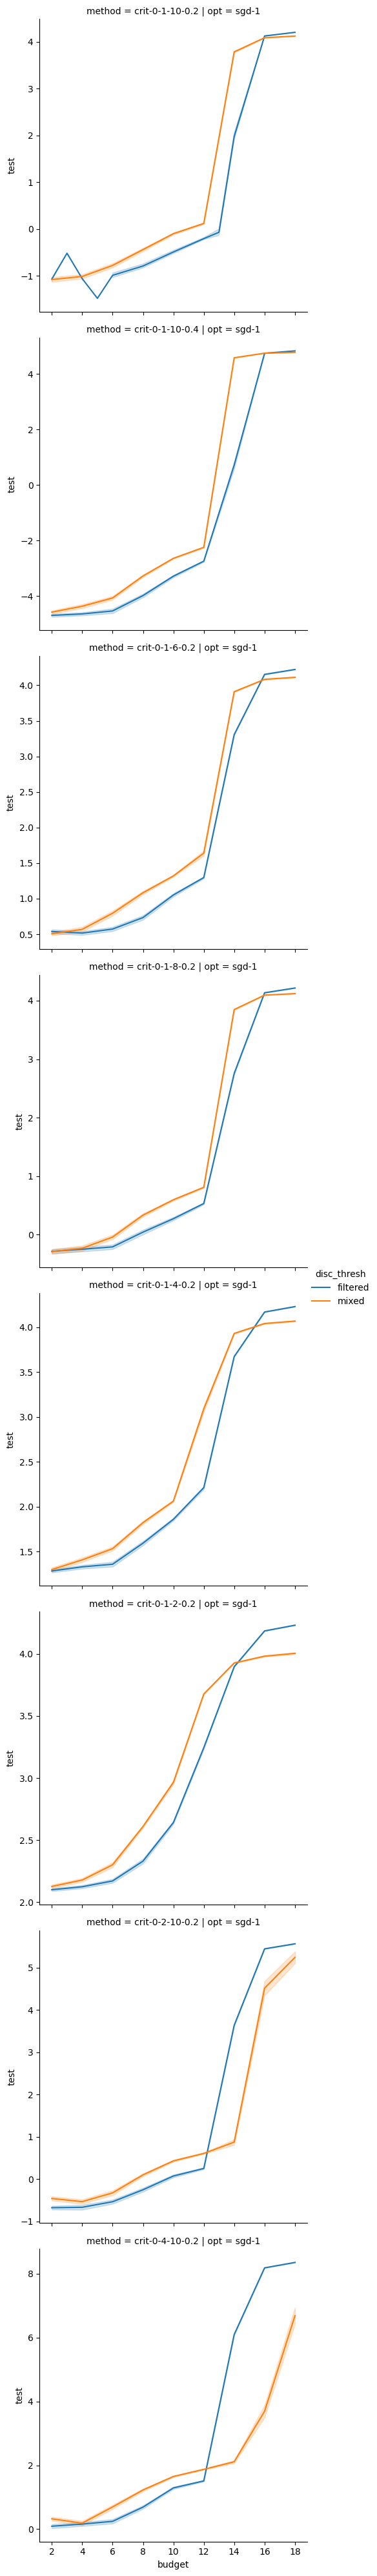

In [59]:
df_ = df[df.disc_thresh.isin([0, 1]) & (df.skillsi=='DCBA')].copy()
df_['disc_thresh'] = df_.disc_thresh.astype(str)
df_['disc_thresh'] = df_.disc_thresh.replace({'0.0':'filtered', '1.0':'mixed'})

g = sns.relplot(
    data=df_,
    x="budget",
    y="test",
    hue="disc_thresh",
    row="method",
    col="opt",
    kind="line",
    errorbar="se",
    facet_kws={"sharey": False},
)

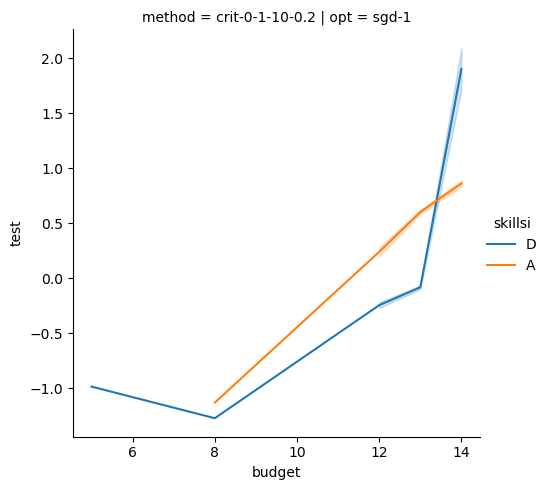

In [52]:
df_ = df[df.skillsi.isin(['A','D'])].copy()
# df_['disc_thresh'] = df_.disc_thresh.astype(str)
# df_['disc_thresh'] = df_.disc_thresh.replace({'0.0':'mixed', '1.0':'filtered'})

g = sns.relplot(
    data=df_,
    x="budget",
    y="test",
    hue="skillsi",
    row="method",
    col="opt",
    kind="line",
    errorbar="se",
    facet_kws={"sharey": False},
)

In [71]:
%%time
df = get_df(28)
df['opt'] = df.opt+"-"+df.lr.astype(str)
df.shape

CPU times: user 1.68 s, sys: 23.4 ms, total: 1.71 s
Wall time: 1.72 s


(77174, 20)

In [54]:
def get_cats(df):
    df_cats = []
    for decisions in [2, 3, 4]:

        mixed = "ABCD"[:decisions]
        high = mixed[-1]
        low = mixed[0]
        onepass = "_".join(mixed)
        up, updown, down = [], [], []

        for i in range(1, decisions):
            up.append(mixed[:i])
            updown.append(mixed[:i])

        up.append(mixed)
        updown.append(mixed)
        down.append(mixed)

        for i in range(1, decisions):
            down.append(mixed[i:])
            updown.append(mixed[i:])

        up, updown, down = "_".join(up), "_".join(updown), "_".join(down)
        skill_categories = {
            "up": up,
            "updown": updown,
            "down": down,
            "mixed": mixed,
            "onepass": onepass,
            "low": low,
            "high": high,
            "lowf": low,
            "highf": high,
            "low_adj": low,
            "high_adj": high,
            "A": "A",
            "B": "B",
            "C": "C",
            "D": "D",
        }

        for label, cat in skill_categories.items():
            df_ = df[df.depth == decisions]
            if not df_.size:
                continue
            df_ = df_[df_.skillsi.apply(lambda x: cat.startswith(x))]
            df_["skills"] = cat
            df_["label"] = label
            df_["depth"] = decisions
            if label in ["low", "high"]:
                df_["budget"] = np.log2((2**df_.budget) / decisions)
            if label in ["low_adj", "high_adj"]:
                df_["budget"] = np.log2((2**df_.budget) * decisions)
            df_cats.append(df_)
    df_cats = pd.concat(df_cats)
    # df_cats['method'] = df_cats.method.apply(lambda x: '-'.join(x.split('-')[:2]))
    return df_cats


df_cats = get_cats(df)

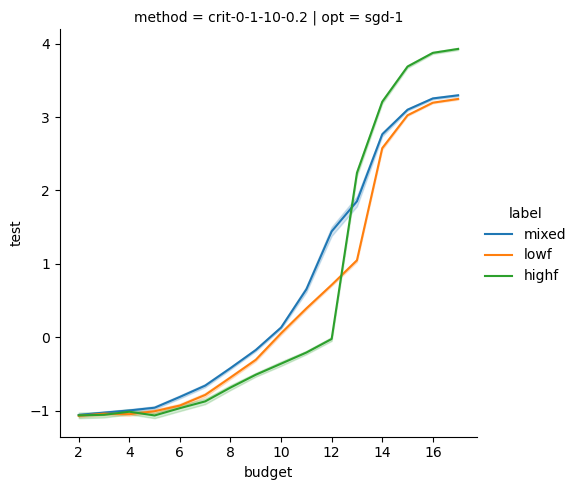

In [56]:
df_ = df_cats.sort_values(["budget", "method"])
# df_ = df_[df_.method == 'normal-2']

df_ = df_[
    df_.label.isin(
        [
            # "updown",
            # "up",
            # "down",
            "mixed",
            # "onepass",
            "lowf",
            "highf",
            # "low",
            # "high",
            # "low",
            # "A","B","C","D",
        ]
    )
]

g = sns.relplot(
    data=df_[df_.method == "crit-0-1-10-0.2"],
    # data=df_,
    x="budget",
    y="test",
    hue="label",
    row="method",
    col="opt",
    kind="line",
    errorbar="se",
    facet_kws={"sharey": False},
)
# plt.xticks(np.arange(df_.budget.min(),df_.budget.max()+1,1))
display(g.figure)
plt.close(g.figure)

In [9]:
df_algo = pd.read_csv(
    "algo5.txt",
    sep=";",
    names=[
        "seed",
        "decisions",
        "mode",
        "start",
        "end",
        "trial",
        "inc",
        "best_branch",
        "branch_vals",
        "budget",
        "valid_loss",
        "valid_test",
        "wp_chosen",
        "wp_equal",
        "wp_high",
    ],
)
df_algo[["A", "B", "C", "D"]] = (
    df_algo.budget.str.slice(1, -1).str.split(expand=True).astype(int)
)
df_algo["budget2"] = np.log2(df_algo[["A", "B", "C", "D"]].sum(axis=1))
df_algo

seed  decisions             mode  start     end  trial  inc  \
0       20          4  crit-0-1-10-0.2     16  262144  0.125  2.0   
1       64          4  crit-0-1-10-0.2     16  262144  0.125  2.0   
2       67          4  crit-0-1-10-0.2     16  262144  0.125  2.0   
3      157          4  crit-0-1-10-0.2     16  262144  0.125  2.0   
4       43          4  crit-0-1-10-0.2     16  262144  0.125  2.0   
...    ...        ...              ...    ...     ...    ...  ...   
4061    57          4  crit-0-1-10-0.2     16  262144  0.125  2.0   
4062   124          4  crit-0-1-10-0.2     16  262144  0.125  2.0   
4063   126          4  crit-0-1-10-0.2     16  262144  0.125  2.0   
4064   163          4  crit-0-1-10-0.2     16  262144  0.125  2.0   
4065   265          4  crit-0-1-10-0.2     16  262144  0.125  2.0   

      best_branch                                        branch_vals  \
0               2  {0: (1.0927863121032715, -0.6263335636166165),...   
1               2  {0: (1.5415780544281006, -1.2901596352565705),...   
2               0  {0: (1.4461992979049683, -0.7292225103995182),...   
3               3  {0: (1.102473497390747, -1.1165463538945823), ...   
4               0  {0: (1.2300450801849365, -0.8464266874080283),...   
...           ...                                                ...   
4061            2  {0: (0.32084140181541443, 3.182281648889095), ...   
4062            1  {0: (0.31418073177337646, 3.06410621256755), 1...   
4063            0  {0: (0.26711511611938477, 3.4467993239045427),...   
4064            1  {0: (0.26005998253822327, 3.160667280644113), ...   
4065            1  {0: (0.30834800004959106, 3.885118203249365), ...   

                             budget  valid_loss  valid_test  wp_chosen  \
0                     [ 4  4 20  4]    1.308322   -0.155677  -0.809359   
1                     [ 4  4 20  4]    1.368736   -0.464101  -0.741008   
2                     [20  4  4  4]    1.446199   -0.729223  -0.910980   
3                     [ 4  4  4 20]    1.258216   -0.828511  -0.155330   
4                     [20  4  4  4]    1.230045   -0.846427  -0.962587   
...                             ...         ...         ...        ...   
4061  [ 25220   2052 234500    372]    0.240416    3.355692   3.300323   
4062      [57348 66052  2116  5556]    0.251894    3.426793   3.214663   
4063  [112788  17988     36    260]    0.267115    3.446799   2.907345   
4064  [ 24644 230708   6276    516]    0.258831    3.316055   3.427354   
4065  [  3076 131652  16420 110996]    0.292685    3.987362   3.977649   

      wp_equal   wp_high       A       B       C       D  budget2  
0    -0.075472 -1.530686       4       4      20       4      5.0  
1    -0.783709 -0.670483       4       4      20       4      5.0  
2    -1.205188 -0.406279      20       4       4       4      5.0  
3    -0.369999  0.048650       4       4       4      20      5.0  
4    -1.226687 -0.752422      20       4       4       4      5.0  
...        ...       ...     ...     ...     ...     ...      ...  
4061  3.332329  4.000217   25220    2052  234500     372     18.0  
4062  2.946112  3.976393   57348   66052    2116    5556     17.0  
4063  3.141934  3.999794  112788   17988      36     260     17.0  
4064  3.233016  4.054642   24644  230708    6276     516     18.0  
4065  3.190832  3.967639    3076  131652   16420  110996     18.0  

[4066 rows x 20 columns]

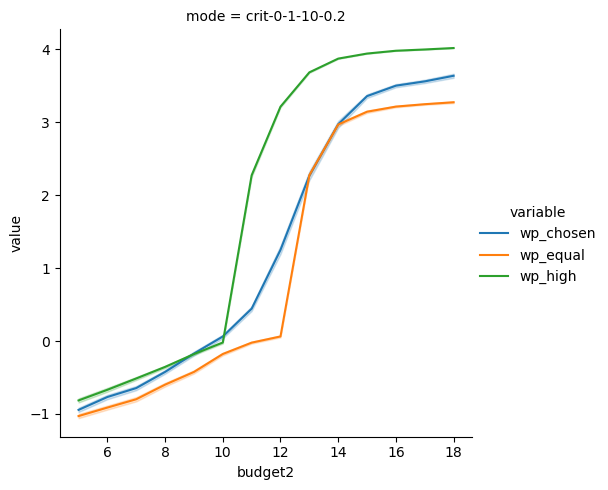

In [10]:
g = sns.relplot(
    data=df_algo.melt(
        id_vars=[
            "seed",
            "decisions",
            "mode",
            "start",
            "end",
            "trial",
            "inc",
            "budget",
            "budget2",
        ],
        value_vars=["wp_chosen", "wp_equal", "wp_high"],
    ),
    x="budget2",
    y="value",
    hue="variable",
    kind="line",
    row="mode",
    errorbar="se",
    facet_kws={"sharey": False},
)
display(g.figure)
plt.close(g.figure)

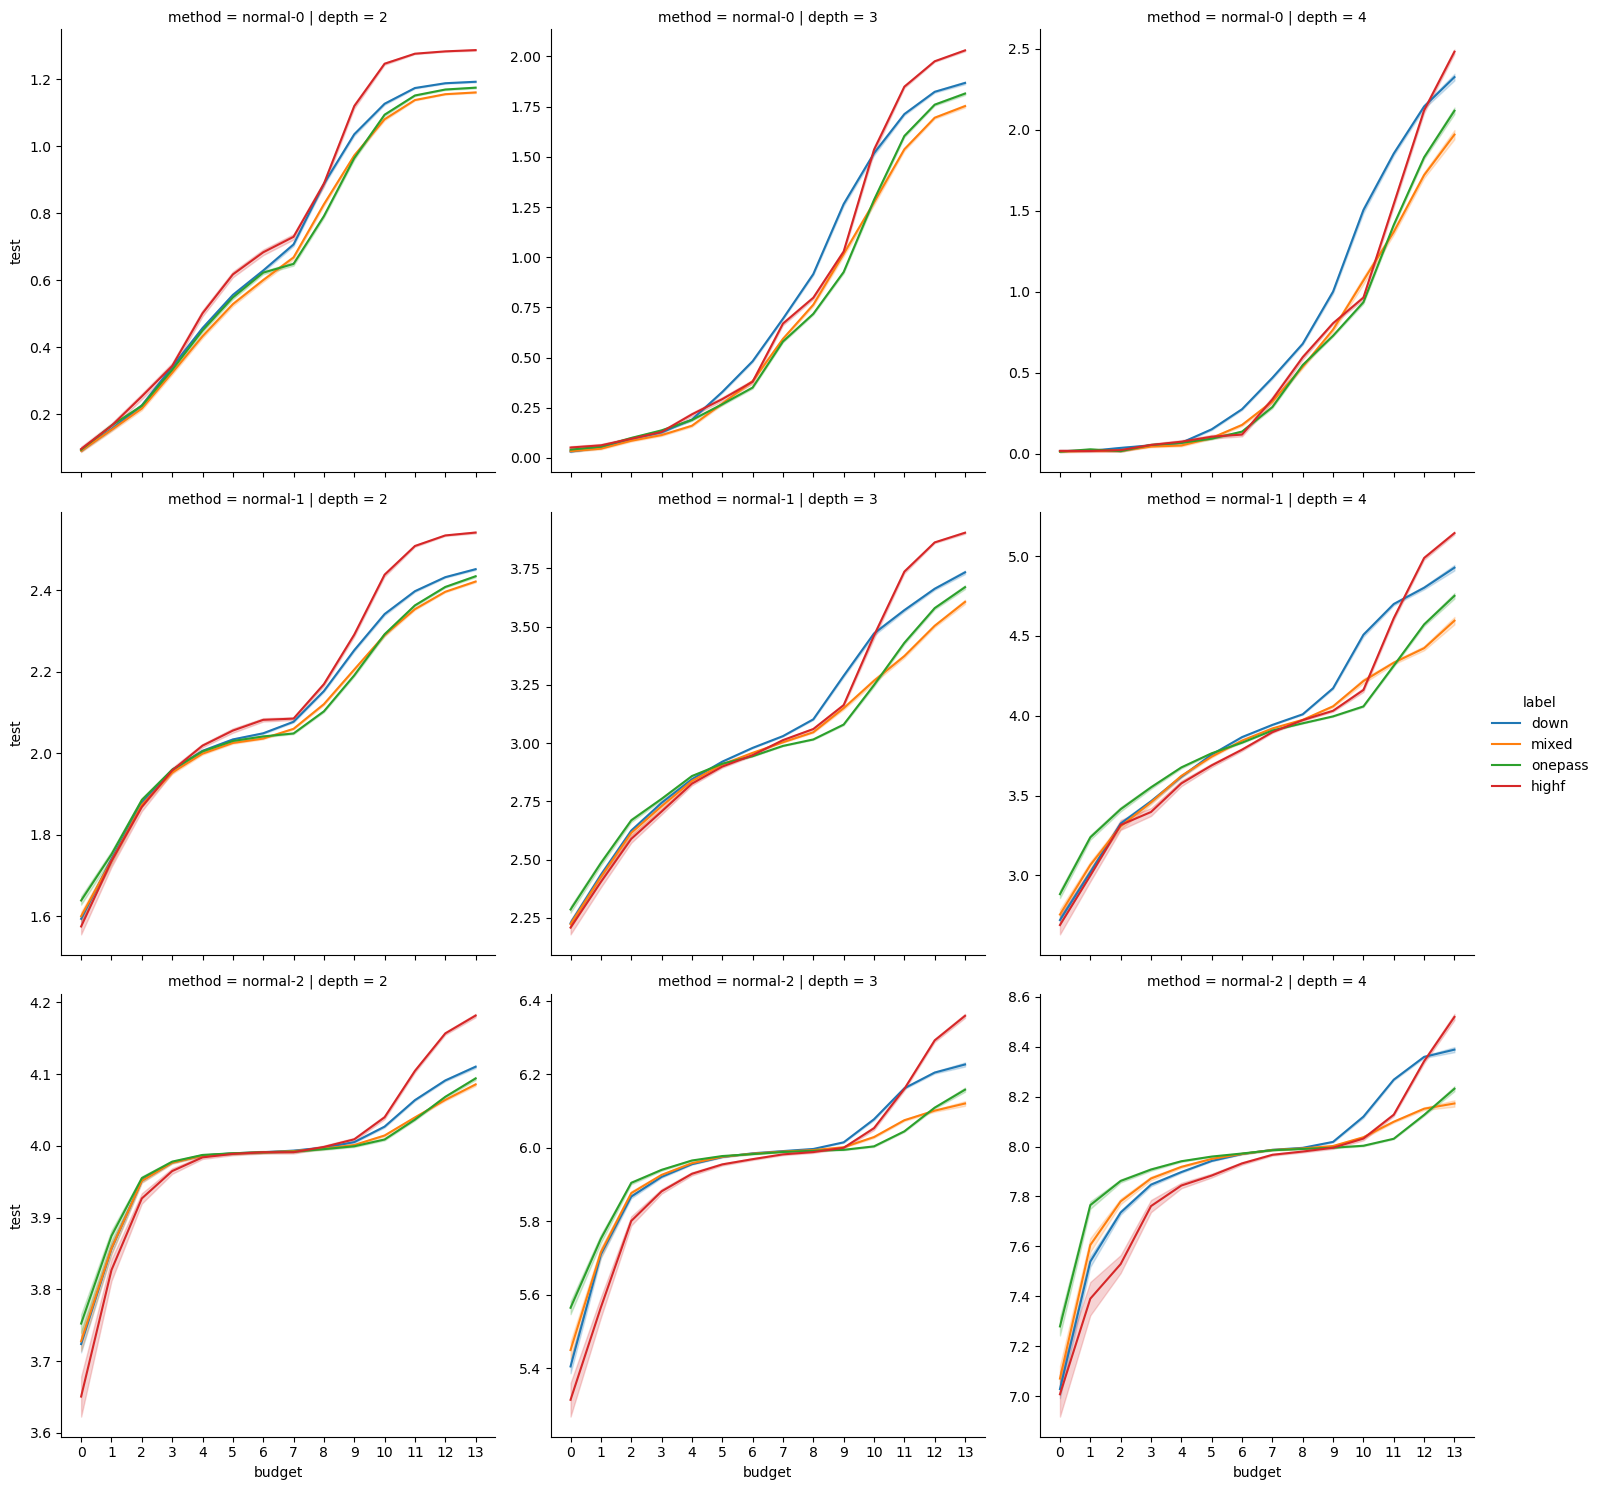

In [111]:
df_ = df_cats20.sort_values(["budget", "method"])

df_ = df_[
    df_.label.isin(
        [
            # "updown",
            # "up",
            "down",
            "mixed",
            "onepass",
            # "lowf",
            "highf",
            # "low",
            # "high",
            # "A","B","C","D",
        ]
    )
]

g = sns.relplot(
    data=df_,
    x="budget",
    y="test",
    hue="label",
    row="method",
    col="depth",
    kind="line",
    errorbar="se",
    facet_kws={"sharey": False},
)
plt.xticks(np.arange(df_.budget.min(), df_.budget.max() + 1, 1))
display(g.figure)
plt.close(g.figure)

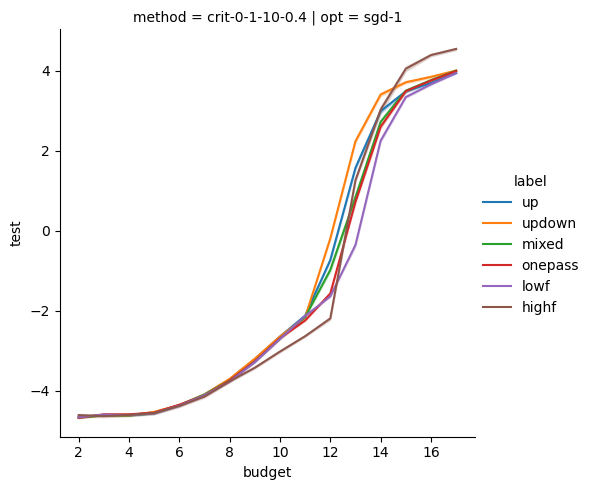

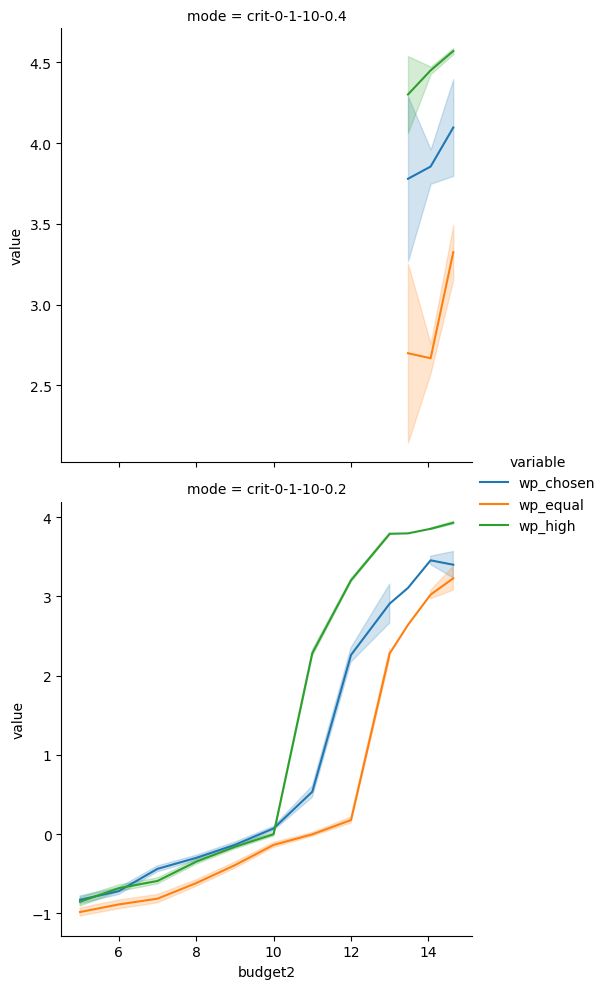

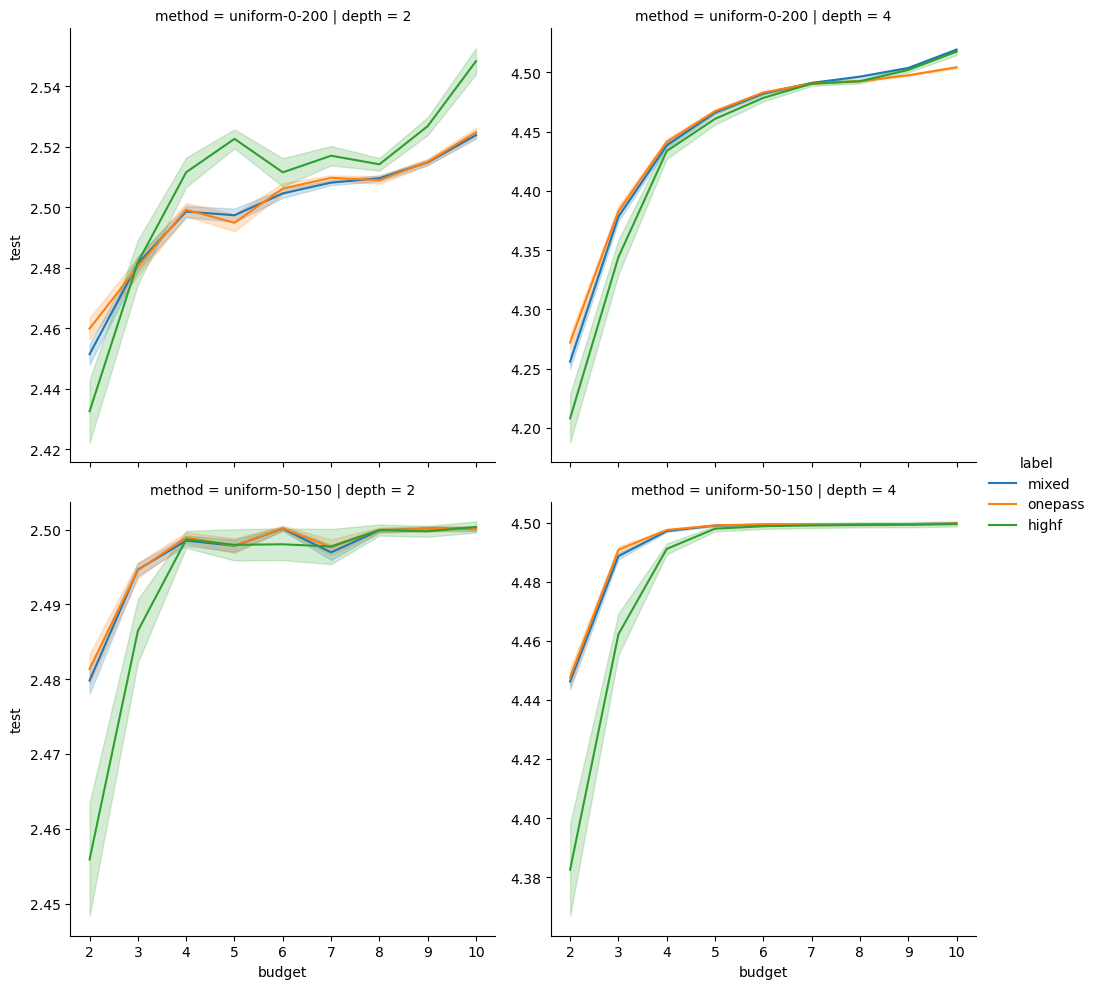

In [28]:
g = sns.relplot(
    data=df_.query("budget <= 10"),
    x="budget",
    y="test",
    hue="label",
    row="method",
    col="depth",
    kind="line",
    errorbar="se",
    facet_kws={"sharey": False},
)
# plt.xticks(np.arange(df_.budget.min(),df_.budget.max()+1,1))
display(g.figure)
plt.close(g.figure)

In [189]:
%%time
df19 = get_df(19)

CPU times: user 5.84 s, sys: 46.5 ms, total: 5.89 s
Wall time: 1min 19s


In [190]:
df19

seed  depth  window      method  budget  stagei  skills   opt  lr  \
0       100      2       0  normal-0-0       1       0    AB_B  adam   1   
1       100      2       0  normal-0-0       1       0  A_AB_B  adam   1   
2       100      2       0  normal-0-0       1       0     A_B  adam   1   
3       100      2       0  normal-0-0       1       1    AB_B  adam   1   
4       100      2       0  normal-0-0       1       1  A_AB_B  adam   1   
...     ...    ...     ...         ...     ...     ...     ...   ...  ..   
21523   423      2       0  normal-2-0      64       1     A_B  adam   1   
21524   423      2       0  normal-2-0      64       2  A_AB_B  adam   1   
21525   424      2       0  normal-2-0      64       0  A_AB_B  adam   1   
21526   424      2       0  normal-2-0      64       1  A_AB_B  adam   1   
21527   424      2       0  normal-2-0      64       2  A_AB_B  adam   1   

       num_nodes  num_layers  patience  epoch      loss       acc     score  \
0             16           1        20   62.0  0.771609  0.533500  0.163727   
1             16           1        20   38.0  0.764101  0.511500  0.192478   
2             16           1        20    4.0  0.735110  0.519750  0.001151   
3             16           1        20    0.0  0.771051  0.527000  0.163727   
4             16           1        20    0.0  0.750809  0.515500  0.192478   
...          ...         ...       ...    ...       ...       ...       ...   
21523         16           1        20    0.0  0.375102  0.897500  4.003348   
21524         16           1        20    0.0  0.325371  0.900000  4.015070   
21525         16           1        20   50.0  0.256983  0.921500  4.054123   
21526         16           1        20    0.0  0.307645  0.907625  4.054123   
21527         16           1        20  157.0  0.289868  0.897250  4.074090   

       wait      test  dup skillsi  
0       0.0  0.148556  1.0      AB  
1       0.0  0.150419  1.0       A  
2       0.0 -0.000228  1.0       A  
3       0.0  0.148556  1.0    AB_B  
4       0.0  0.150419  1.0    A_AB  
...     ...       ...  ...     ...  
21523   0.0  3.966667  1.0     A_B  
21524   0.0  3.990765  1.0  A_AB_B  
21525   0.0  3.903750  1.0       A  
21526   0.0  3.903750  1.0    A_AB  
21527   0.0  3.917688  1.0  A_AB_B  

[21528 rows x 20 columns]

In [191]:
df19_ = pd.concat([df19, df18_])
df19_

seed  depth  window      method  budget  stagei  skills   opt   lr  \
0        100      2     0.0  normal-0-0       1       0    AB_B  adam  1.0   
1        100      2     0.0  normal-0-0       1       0  A_AB_B  adam  1.0   
2        100      2     0.0  normal-0-0       1       0     A_B  adam  1.0   
3        100      2     0.0  normal-0-0       1       1    AB_B  adam  1.0   
4        100      2     0.0  normal-0-0       1       1  A_AB_B  adam  1.0   
...      ...    ...     ...         ...     ...     ...     ...   ...  ...   
129723   717      4     NaN  normal-0-0       1       1       D   NaN  NaN   
129724   718      4     NaN  normal-0-0       1       1       A   NaN  NaN   
129725   718      4     NaN  normal-0-0       1       1       B   NaN  NaN   
129726   718      4     NaN  normal-0-0       1       1       C   NaN  NaN   
129727   718      4     NaN  normal-0-0       1       1       D   NaN  NaN   

        num_nodes  ...  patience  epoch      loss      acc     score  wait  \
0            16.0  ...      20.0   62.0  0.771609  0.53350  0.163727   0.0   
1            16.0  ...      20.0   38.0  0.764101  0.51150  0.192478   0.0   
2            16.0  ...      20.0    4.0  0.735110  0.51975  0.001151   0.0   
3            16.0  ...      20.0    0.0  0.771051  0.52700  0.163727   0.0   
4            16.0  ...      20.0    0.0  0.750809  0.51550  0.192478   0.0   
...           ...  ...       ...    ...       ...      ...       ...   ...   
129723        NaN  ...       NaN    NaN       NaN      NaN       NaN   NaN   
129724        NaN  ...       NaN    NaN       NaN      NaN       NaN   NaN   
129725        NaN  ...       NaN    NaN       NaN      NaN       NaN   NaN   
129726        NaN  ...       NaN    NaN       NaN      NaN       NaN   NaN   
129727        NaN  ...       NaN    NaN       NaN      NaN       NaN   NaN   

            test  dup  skillsi vision  
0       0.148556  1.0       AB    NaN  
1       0.150419  1.0        A    NaN  
2      -0.000228  1.0        A    NaN  
3       0.148556  1.0     AB_B    NaN  
4       0.150419  1.0     A_AB    NaN  
...          ...  ...      ...    ...  
129723  0.121786  NaN        D    4.0  
129724 -0.267044  NaN        A    1.0  
129725  0.011311  NaN        B    2.0  
129726 -0.353656  NaN        C    3.0  
129727 -0.014057  NaN        D    4.0  

[151256 rows x 21 columns]

In [192]:
df_cats = []
for decisions in [2, 3, 4]:

    mixed = "ABCD"[:decisions]
    high = mixed[-1]
    onepass = "_".join(mixed)
    up, updown, down = [], [], []

    for i in range(1, decisions):
        up.append(mixed[:i])
        updown.append(mixed[:i])

    up.append(mixed)
    updown.append(mixed)
    down.append(mixed)

    for i in range(1, decisions):
        down.append(mixed[i:])
        updown.append(mixed[i:])

    up, updown, down = "_".join(up), "_".join(updown), "_".join(down)
    skill_categories = {
        "up": up,
        "updown": updown,
        "down": down,
        "mixed": mixed,
        "onepass": onepass,
    }

    for label, cat in skill_categories.items():
        df_ = df19[df19.depth == decisions]
        df_ = df_[df_.skillsi.apply(lambda x: cat.startswith(x))]
        df_ = (
            df_.groupby(["seed", "depth", "method", "budget"]).test.max().reset_index()
        )
        df_["skills"] = cat
        df_["label"] = label
        df_["depth"] = decisions
        df_cats.append(df_)

    df_ = df18_[df18_.depth == decisions]
    df_ = df_[df_.skillsi.apply(lambda x: high.startswith(x))]
    df_ = df_.groupby(["seed", "depth", "method", "budget"]).test.max().reset_index()
    df_["skills"] = high
    df_["budget"] *= 4
    df_["label"] = "high"
    df_["depth"] = decisions
    df_cats.append(df_)


df_cats = pd.concat(df_cats)
df_cats

seed  depth      method  budget      test skills label
0       100      2  normal-0-0       1  0.150419   A_AB    up
1       100      2  normal-0-0       2  0.174783   A_AB    up
2       100      2  normal-0-0       4  0.309078   A_AB    up
3       100      2  normal-0-0       8  0.384087   A_AB    up
4       100      2  normal-0-0      16  0.394021   A_AB    up
...     ...    ...         ...     ...       ...    ...   ...
15325   714      4  normal-0-0       4 -0.235666      D  high
15326   715      4  normal-0-0       4  0.049980      D  high
15327   716      4  normal-0-0       4  0.015926      D  high
15328   717      4  normal-0-0       4  0.121786      D  high
15329   718      4  normal-0-0       4 -0.014057      D  high

[53353 rows x 7 columns]

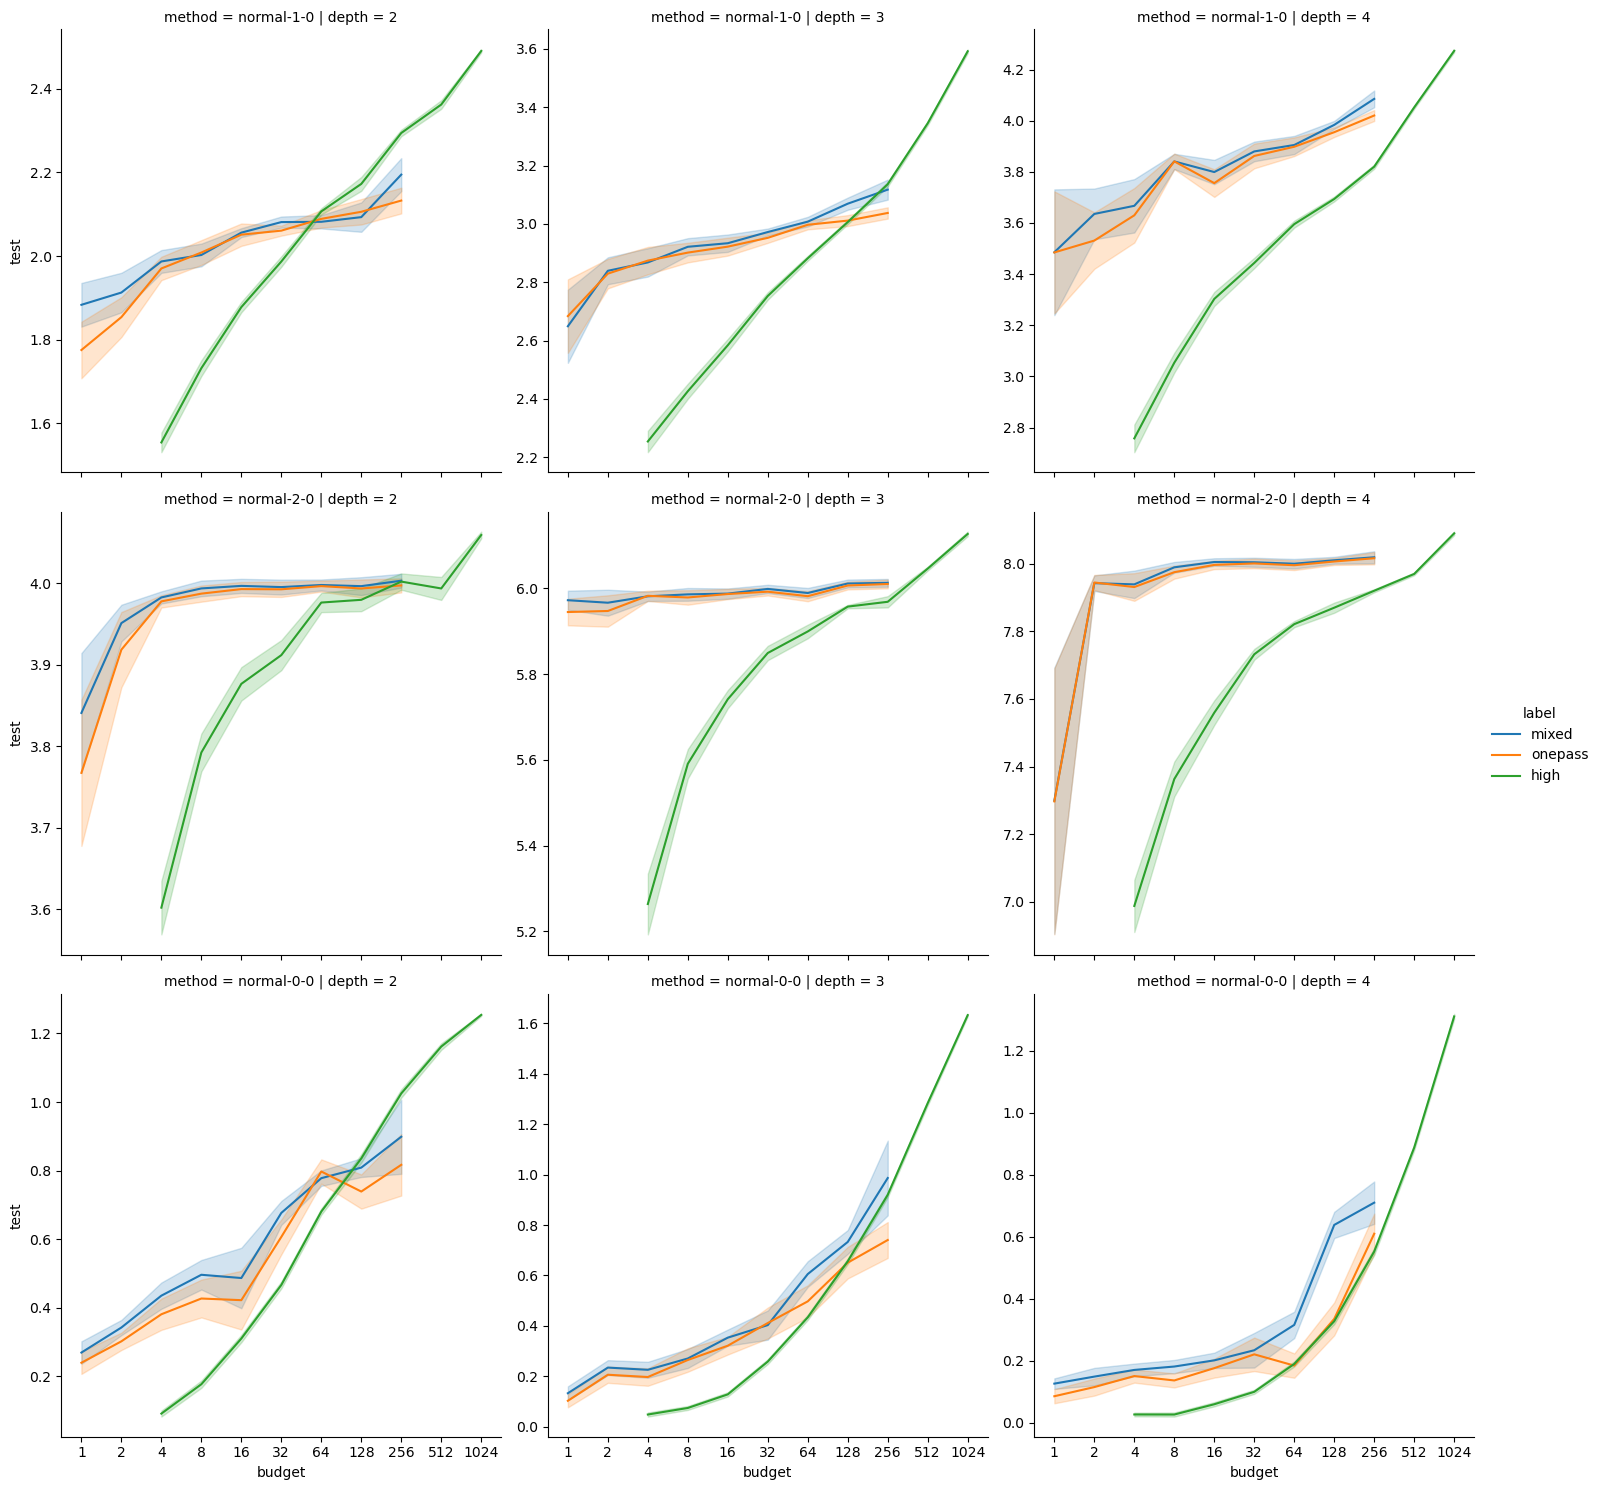

In [193]:
df_ = df_cats.sort_values("budget").astype({"budget": "str"})

g = sns.relplot(
    data=df_[df_.label.isin(["mixed", "onepass", "high"])],
    x="budget",
    y="test",
    hue="label",
    row="method",
    col="depth",
    kind="line",
    errorbar="se",
    facet_kws={"sharey": False},
)
display(g.figure)
plt.close(g.figure)

methods = list(df_.method.unique())


def color_alternate_columns(row):
    def get_style(idx, value):
        style = ""
        if (idx[0] + methods.index(row.name[0])) % 2 == 0:
            style += "background-color: #E6F3FF;"
        else:
            style += "background-color: #E6FFE6;"

        max_val = max(value_ for idx_, value_ in row.items() if idx_[0] == idx[0])
        if value == max_val:
            style += "font-weight: bold;"
        return style

    colors = [get_style(idx, value) for idx, value in row.items()]
    return colors


pivoted = df_.pivot_table(
    index=["method", "budget"], columns=["depth", "label"], values="test"
)
display(pivoted.style.apply(color_alternate_columns, axis=1).format(precision=3))


def color_alternate_columns(row):
    def get_style(idx, value):
        style = ""
        if (idx[0] + methods.index(row.name[0])) % 2 == 0:
            style += "background-color: #E6F3FF;"
        else:
            style += "background-color: #E6FFE6;"
        return style

    colors = [get_style(idx, value) for idx, value in row.items()]
    return colors


pivoted = df_.pivot_table(
    index=["method", "budget"], columns=["depth", "label"], values="seed", aggfunc=len
)
display(pivoted.style.apply(color_alternate_columns, axis=1).format(precision=0))

In [ ]:
df_[(df_.method == "normal-2-0") & (df_.depth == 4)].pi

In [124]:
names = [
    "seed",
    "depth",
    "window",
    "method",
    "budget",
    "vision",
    "temp",
    "opt",
    "lr",
    "num_nodes",
    "num_layers",
    "epoch",
    "loss",
    "acc",
    "score",
    "wait",
    "patience",
    "test",
]

categories = [
    "seed",
    "depth",
    "window",
    "method",
    "budget",
    "vision",
    "temp",
    "opt",
    "lr",
    "num_nodes",
    "num_layers",
    "patience",
]


def get_df(v):
    df = pd.read_csv(
        f"/storage1/fs1/chien-ju.ho/Active/tree/output{v}.txt", names=names
    )
    df["dup"] = (df.epoch == 0).astype(int)
    df["dup"] = df.groupby(categories)["dup"].cumsum()
    df = df.groupby(categories + ["dup"]).filter(
        lambda x: x["wait"].max() == x["patience"].iloc[0]
    )
    df = df[df.wait == 0]
    df = df.drop_duplicates(categories + ["dup"], keep="last")
    df = df.groupby(categories).mean().reset_index()
    # df['skill'] = df.apply(lambda x: f"({x.vision}, {x.temp})", axis=1)
    return df

In [125]:
%%time
df18 = get_df(18)

CPU times: user 2min 9s, sys: 13.1 s, total: 2min 22s
Wall time: 2min 22s


In [126]:
df18

seed  depth  window      method  budget  vision  temp   opt   lr  \
0          0      2       0  normal-0-0       1       1  0.00  adam  1.0   
1          0      2       0  normal-0-0       1       2  0.00  adam  1.0   
2          0      2       0  normal-0-0       1       2  0.01  adam  1.0   
3          0      2       0  normal-0-0       1       2  0.10  adam  1.0   
4          0      2       0  normal-0-0       1       2  1.00  adam  1.0   
...      ...    ...     ...         ...     ...     ...   ...   ...  ...   
306980   717      4       0  normal-0-0       1       4  1.00  adam  1.0   
306981   718      4       0  normal-0-0       1       1  0.00  adam  1.0   
306982   718      4       0  normal-0-0       1       2  0.00  adam  1.0   
306983   718      4       0  normal-0-0       1       3  0.00  adam  1.0   
306984   718      4       0  normal-0-0       1       4  0.00  adam  1.0   

        num_nodes  num_layers  patience  epoch      loss       acc     score  \
0              16           1        20  112.0  0.635044  0.630500  0.613997   
1              16           1        20    2.0  0.803121  0.444500 -0.124295   
2              16           1        20   45.0  0.775687  0.544250  0.244185   
3              16           1        20    0.0  0.835660  0.450250 -0.068380   
4              16           1        20   34.0  0.758305  0.533000  0.249632   
...           ...         ...       ...    ...       ...       ...       ...   
306980         16           1        20    0.0  0.961463  0.491625 -0.151735   
306981         16           1        20   35.0  0.760386  0.502125 -0.187205   
306982         16           1        20   59.0  0.841145  0.504875 -0.066216   
306983         16           1        20    3.0  0.885183  0.476625 -0.292095   
306984         16           1        20   11.0  0.774193  0.500375  0.013071   

        wait      test  dup  
0        0.0  0.581451  1.0  
1        0.0 -0.126232  1.0  
2        0.0  0.264131  1.0  
3        0.0 -0.114524  1.0  
4        0.0  0.171739  1.0  
...      ...       ...  ...  
306980   0.0  0.045267  1.0  
306981   0.0 -0.267044  1.0  
306982   0.0  0.011311  1.0  
306983   0.0 -0.353656  1.0  
306984   0.0 -0.014057  1.0  

[306985 rows x 19 columns]

In [151]:
df18_ = (
    df18[df18.temp == 0]
    .groupby(["seed", "depth", "method", "vision", "budget"])
    .test.max()
    .reset_index()
)
df18_["skills"] = df18_.vision.replace({1: "A", 2: "B", 3: "C", 4: "D"})
df18_["skillsi"] = df18_.skills
df18_["stagei"] = 1
df18_

seed  depth      method  vision  budget      test skills skillsi  \
0          0      2  normal-0-0       1       1  0.581451      A       A   
1          0      2  normal-0-0       1       2  0.527010      A       A   
2          0      2  normal-0-0       1       4  0.286910      A       A   
3          0      2  normal-0-0       1       8  0.748186      A       A   
4          0      2  normal-0-0       1      16  0.708196      A       A   
...      ...    ...         ...     ...     ...       ...    ...     ...   
129723   717      4  normal-0-0       4       1  0.121786      D       D   
129724   718      4  normal-0-0       1       1 -0.267044      A       A   
129725   718      4  normal-0-0       2       1  0.011311      B       B   
129726   718      4  normal-0-0       3       1 -0.353656      C       C   
129727   718      4  normal-0-0       4       1 -0.014057      D       D   

        stagei  
0            1  
1            1  
2            1  
3            1  
4            1  
...        ...  
129723       1  
129724       1  
129725       1  
129726       1  
129727       1  

[129728 rows x 9 columns]

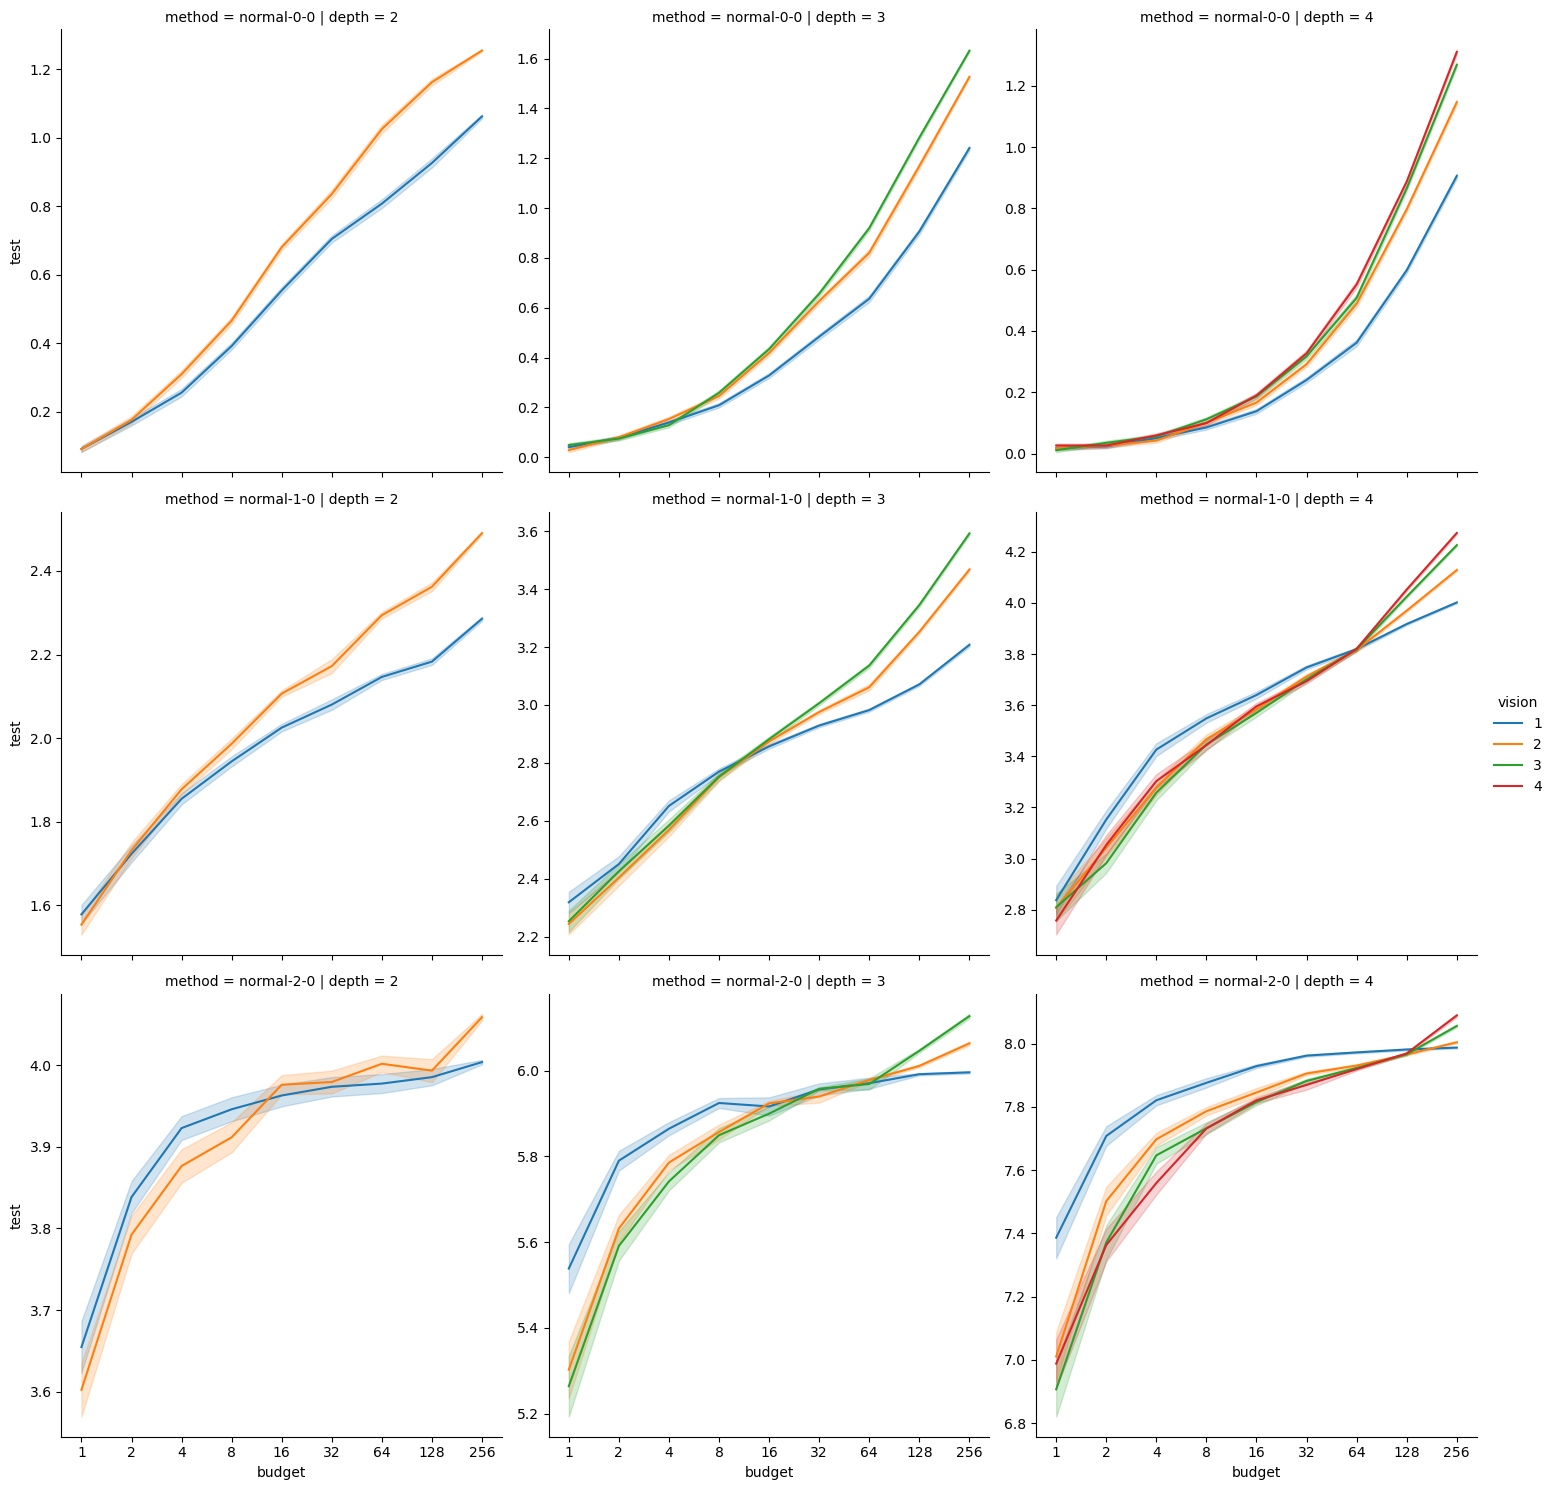

In [104]:
# skill = 'temp'
skill = "vision"

if skill == "temp":
    df_ = df18[df18.temp != 0]
else:
    df_ = df18[df18.temp == 0]
df_ = df_.astype({"budget": "str", "vision": "str", "temp": "str"})

g = sns.relplot(
    data=df_,
    x="budget",
    y="test",
    hue=skill,
    row="method",
    col="depth",
    kind="line",
    errorbar="se",
    facet_kws={"sharey": False},
)
display(g.figure)
plt.close(g.figure)

methods = list(df_.method.unique())


def color_alternate_columns(row):
    def get_style(idx, value):
        style = ""
        if (idx[0] + methods.index(row.name[0])) % 2 == 0:
            style += "background-color: #E6F3FF;"
        else:
            style += "background-color: #E6FFE6;"

        max_val = max(value_ for idx_, value_ in row.items() if idx_[0] == idx[0])
        if value == max_val:
            style += "font-weight: bold;"
        return style

    colors = [get_style(idx, value) for idx, value in row.items()]
    return colors


pivoted = df_.pivot_table(
    index=["method", "budget"], columns=["depth", skill], values="test"
)
display(pivoted.style.apply(color_alternate_columns, axis=1).format(precision=3))


def color_alternate_columns(row):
    def get_style(idx, value):
        style = ""
        if (idx[0] + methods.index(row.name[0])) % 2 == 0:
            style += "background-color: #E6F3FF;"
        else:
            style += "background-color: #E6FFE6;"
        return style

    colors = [get_style(idx, value) for idx, value in row.items()]
    return colors


pivoted = df_.pivot_table(
    index=["method", "budget"], columns=["depth", skill], values="seed", aggfunc=len
)
display(pivoted.style.apply(color_alternate_columns, axis=1).format(precision=0))